# Comprensión del conjunto de datos

## Importación de las librerias necesarias

In [279]:
# importamos las librerias necesarias
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import AgglomerativeClustering

#from helper_functions import do_pca, scree_plot, plot_components, pca_results
from IPython import display
#import test_code2 as t

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Carga del conjunto de datos (DataFrame)

In [280]:
# Cargamos el dataframe
data = pd.read_csv('AccidentesTransito.csv')

## Revisamos la información del DataFrame

In [281]:
#Observamos la cantidad de registros que existen dentro del dataframe y el numero de columnas que este tiene
data.shape

(38197, 26)

In [282]:
# Visualiza las primeras filas del conjunto de datos para comprender su estructura 
print(data.head())

   ORDEN       FECHA   AÑO        MES          DÍA     GRAVEDAD  PEATON  \
0      1  01/01/2012  2012  01. Enero  07. Domingo  Con Heridos       0   
1      2  01/01/2012  2012  01. Enero  07. Domingo   Solo Daños       0   
2      3  01/01/2012  2012  01. Enero  07. Domingo   Solo Daños       0   
3      4  01/01/2012  2012  01. Enero  07. Domingo   Solo Daños       0   
4      5  01/01/2012  2012  01. Enero  07. Domingo  Con Heridos       1   

   AUTOMOVIL  CAMPAERO  CAMIONETA  ...  BICICLETA  OTRO        VIA 1  \
0          1         0          0  ...          0     0        CALLE   
1          1         0          1  ...          0     0  VIA MATANZA   
2          0         0          1  ...          0     0      CARRERA   
3          1         0          1  ...          0     0      CARRERA   
4          0         0          0  ...          0     0      CARRERA   

               BARRIO            HORA      ENTIDAD            nombrecomuna  \
0               Mutis  12:15:00 p. m. 

In [283]:
#Observamos información general sobre el conjunto de datos, incluyendo tipos de datos y recuento de valores no nulos
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38197 entries, 0 to 38196
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ORDEN                    38197 non-null  int64 
 1   FECHA                    38197 non-null  object
 2   AÑO                      38197 non-null  int64 
 3   MES                      38197 non-null  object
 4   DÍA                      38197 non-null  object
 5   GRAVEDAD                 38197 non-null  object
 6   PEATON                   38197 non-null  int64 
 7   AUTOMOVIL                38197 non-null  int64 
 8   CAMPAERO                 38197 non-null  int64 
 9   CAMIONETA                38197 non-null  int64 
 10  MICRO                    38197 non-null  int64 
 11  BUSETA                   38197 non-null  int64 
 12  BUS                      38197 non-null  int64 
 13  CAMION                   38197 non-null  int64 
 14  VOLQUETA                 38197 non-nul

In [284]:
#Listado de columnas (Variables)
print(data.columns)

Index(['ORDEN', 'FECHA', 'AÑO', 'MES', 'DÍA', 'GRAVEDAD', 'PEATON',
       'AUTOMOVIL', 'CAMPAERO', 'CAMIONETA', 'MICRO', 'BUSETA', 'BUS',
       'CAMION', 'VOLQUETA', 'MOTO', 'BICICLETA', 'OTRO', 'VIA 1', 'BARRIO',
       'HORA', 'ENTIDAD', 'nombrecomuna', 'Propietario de Vehículo',
       'DIURNIO/NOCTURNO', 'HORA RESTRICCION MOTO'],
      dtype='object')


## Creamos un resumen de variables numericas

In [285]:
# Muestra el resumen estadístico de variables numéricas
print(data.describe())

              ORDEN           AÑO       PEATON     AUTOMOVIL      CAMPAERO  \
count  38197.000000  38197.000000  38197.00000  38197.000000  38197.000000   
mean   19099.000000   2016.480430      0.10472      0.786292      0.060947   
std    11026.668453      3.063243      0.33937      0.743994      0.245928   
min        1.000000   2012.000000      0.00000      0.000000      0.000000   
25%     9550.000000   2014.000000      0.00000      0.000000      0.000000   
50%    19099.000000   2016.000000      0.00000      1.000000      0.000000   
75%    28648.000000   2019.000000      0.00000      1.000000      0.000000   
max    38197.000000   2023.000000      7.00000     29.000000      2.000000   

          CAMIONETA         MICRO        BUSETA           BUS        CAMION  \
count  38197.000000  38197.000000  38197.000000  38197.000000  38197.000000   
mean       0.197555      0.020290      0.044061      0.048198      0.083279   
std        0.432211      0.141916      0.211639      0.21830

##  Separación de las variables Númericas y Categoricas

In [286]:
def mostrar_informacion_variables(data):
    print("Análisis de Variables:")
    print("-----------------------")

    # Identificar variables categóricas
    categorical_variables = data.select_dtypes(include='object').columns.tolist()
    print("\nVariables Categóricas:")
    for var in categorical_variables:
        print(f"- {var}")

    # Identificar variables numéricas
    numeric_variables = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
    print("\nVariables Numéricas:")
    for var in numeric_variables:
        print(f"- {var}")

data = pd.read_csv('AccidentesTransito.csv') 

mostrar_informacion_variables(data)

Análisis de Variables:
-----------------------

Variables Categóricas:
- FECHA
- MES
- DÍA
- GRAVEDAD
- VIA 1
- BARRIO
- HORA
- ENTIDAD
- nombrecomuna
- Propietario de Vehículo
- DIURNIO/NOCTURNO
- HORA RESTRICCION MOTO

Variables Numéricas:
- ORDEN
- AÑO
- PEATON
- AUTOMOVIL
- CAMPAERO
- CAMIONETA
- MICRO
- BUSETA
- BUS
- CAMION
- VOLQUETA
- MOTO
- BICICLETA
- OTRO


### Analizamos los valores de las columnas

In [287]:

# Lista de columnas que deseas analizar
columnas_a_analizar = ['GRAVEDAD', 'PEATON', 'AUTOMOVIL', 'CAMPAERO','CAMIONETA',
                       'MICRO', 'BUSETA', 'BUS','CAMION', 'VOLQUETA', 'MOTO', 'BICICLETA','OTRO','DIURNIO/NOCTURNO']

# Realiza el conteo de valores únicos para cada columna y muestra los resultados
for columna in columnas_a_analizar:
    print(f"Conteo de valores únicos para la columna {columna}:")
    print(data[columna].value_counts())
    print("\n")  # Agrega una línea en blanco entre las salidas

Conteo de valores únicos para la columna GRAVEDAD:
GRAVEDAD
Solo Daños     19475
Con Heridos    18051
Con Muertos      562
Con heridos       99
Con muertos        6
Solo daños         4
Name: count, dtype: int64


Conteo de valores únicos para la columna PEATON:
PEATON
0    34508
1     3439
2      210
3       29
4        6
6        3
5        1
7        1
Name: count, dtype: int64


Conteo de valores únicos para la columna AUTOMOVIL:
AUTOMOVIL
1     17807
0     14501
2      5530
3       325
4        27
5         3
17        1
10        1
13        1
29        1
Name: count, dtype: int64


Conteo de valores únicos para la columna CAMPAERO:
CAMPAERO
0    35931
1     2204
2       62
Name: count, dtype: int64


Conteo de valores únicos para la columna CAMIONETA:
CAMIONETA
0    31180
1     6499
2      507
3       11
Name: count, dtype: int64


Conteo de valores únicos para la columna MICRO:
MICRO
0    37427
1      765
2        5
Name: count, dtype: int64


Conteo de valores únicos para la c

## Conteo de valores unicos en columnas categoricas

In [288]:
import pandas as pd

def mostrar_valores_unicos(data, categorical_variables):
    print("Análisis de Variables Categóricas:")
    print("----------------------------------")

    for column in categorical_variables:
        unique_values = data[column].unique()
        print(f"\nVariable: {column}")
        print(f"Valores únicos: {unique_values}\nTotal de valores únicos: {len(unique_values)}\n")

# Lista de variables categóricas
categorical_variables = ['FECHA', 'MES', 'DÍA', 'GRAVEDAD', 'VIA 1', 'BARRIO', 'HORA', 'ENTIDAD', 'nombrecomuna', 'Propietario de Vehículo', 'DIURNIO/NOCTURNO', 'HORA RESTRICCION MOTO']

# Ejemplo de uso
mostrar_valores_unicos(data, categorical_variables)

Análisis de Variables Categóricas:
----------------------------------

Variable: FECHA
Valores únicos: ['01/01/2012' '02/01/2012' '03/01/2012' ... '27/02/2023' '28/02/2023'
 '11/03/2023']
Total de valores únicos: 4050


Variable: MES
Valores únicos: ['01. Enero' '02. Febrero' '03. Marzo' '04. Abril' '05. Mayo' '06. Junio'
 '07. Julio' '08. Agosto' '09. Septiembre' '10. Octubre' '11. Noviembre'
 '12. Diciembre']
Total de valores únicos: 12


Variable: DÍA
Valores únicos: ['07. Domingo' '01. Lunes' '02. Martes' '03. Miercoles' '04. Jueves'
 '05. Viernes' '06. Sabado']
Total de valores únicos: 7


Variable: GRAVEDAD
Valores únicos: ['Con Heridos' 'Solo Daños' 'Con Muertos' 'Con heridos' 'Solo daños'
 'Con muertos']
Total de valores únicos: 6


Variable: VIA 1
Valores únicos: ['CALLE' 'VIA MATANZA' 'CARRERA' 'TRANSVERSAL METROPOLITANA'
 'AUTOPISTA  NORTE' 'AVENIDA Q SECA' 'ANILLO VIAL'
 'AUTOPISTA FLORIDA BUCARAMANGA' 'CALLE 45 VIA CHIMITA'
 'AVENIDA  GONZALEZ VALENCIA' 'AUTOPISTA GIRÓN' '

# Limpieza de los datos

## Revision de valores nulos en las columnas

In [289]:
#Verifico los datos faltantes del dataset o nulos
data.isnull().sum()

ORDEN                        0
FECHA                        0
AÑO                          0
MES                          0
DÍA                          0
GRAVEDAD                     0
PEATON                       0
AUTOMOVIL                    0
CAMPAERO                     0
CAMIONETA                    0
MICRO                        0
BUSETA                       0
BUS                          0
CAMION                       0
VOLQUETA                     0
MOTO                         0
BICICLETA                    0
OTRO                         0
VIA 1                        0
BARRIO                       0
HORA                       266
ENTIDAD                    245
nombrecomuna                 0
Propietario de Vehículo      0
DIURNIO/NOCTURNO             0
HORA RESTRICCION MOTO        0
dtype: int64

In [290]:
def mostrar_valores_faltantes(data):
    print("Análisis de Valores Faltantes:")
    print("--------------------------------")

    # Identificar valores faltantes en cada columna
    missing_values = data.isnull().sum()

    # Mostrar la cantidad de valores faltantes por columna
    for column, missing_count in missing_values.items():
        if missing_count > 0:
            print(f"En la columna '{column}' hay {missing_count} valores faltantes.")

mostrar_valores_faltantes(data)

Análisis de Valores Faltantes:
--------------------------------
En la columna 'HORA' hay 266 valores faltantes.
En la columna 'ENTIDAD' hay 245 valores faltantes.


### Imputacion de valores faltantes en la columna "HORA"

Al ser una variable con tan pocos datos faltantes se pueden agregar mediante la moda o la mediana, tambien se puede optar por eliminar los valores faltantes ya que el dataset cuenta con bastantes registros para su analisis.

In [291]:
def imputar_valores_faltantes_con_moda(data, columna):
    print(f"Imputación de Valores Faltantes en la columna '{columna}':")
    print("----------------------------------------------------------")

    # Calcula la moda de la columna
    moda_columna = data[columna].mode()[0]

    # Imputa los valores faltantes con la moda
    data[columna] = data[columna].fillna(moda_columna)

    # Verifica que ya no hay valores faltantes en la columna
    valores_faltantes_despues = data[columna].isnull().sum()
    print(f"Se imputaron los valores faltantes. Total de valores faltantes ahora: {valores_faltantes_despues}\n")

imputar_valores_faltantes_con_moda(data, 'HORA')

Imputación de Valores Faltantes en la columna 'HORA':
----------------------------------------------------------
Se imputaron los valores faltantes. Total de valores faltantes ahora: 0



### Imputación de los valores faltantes en la columna "ENTIDAD"

Al ser una variable con tan pocos datos faltantes se pueden agregar mediante la moda o la mediana, tambien se puede optar por eliminar los valores faltantes ya que el dataset cuenta con bastantes registros para su analisis.

In [292]:
def imputar_con_moda_y_verificar(data, columna):
    print(f"Imputación con Moda - Columna '{columna}':")
    print("------------------------------------------------")

    # Verifica si hay valores faltantes antes de la imputación
    valores_faltantes_antes = data[columna].isnull().sum()
    print(f"Antes de la imputación, hay {valores_faltantes_antes} valores faltantes en la columna '{columna}'.")

    # Calcula la moda de la columna
    moda_columna = data[columna].mode()[0]

    # Imputa los valores faltantes con la moda
    data[columna] = data[columna].fillna(moda_columna)

    # Verifica que ya no hay valores faltantes después de la imputación
    valores_faltantes_despues = data[columna].isnull().sum()
    print(f"Después de la imputación, ya no hay valores faltantes en la columna '{columna}'.\n")

imputar_con_moda_y_verificar(data, 'ENTIDAD')

Imputación con Moda - Columna 'ENTIDAD':
------------------------------------------------
Antes de la imputación, hay 245 valores faltantes en la columna 'ENTIDAD'.
Después de la imputación, ya no hay valores faltantes en la columna 'ENTIDAD'.



## Verificar valores Erroneos en variables temporales

In [293]:
def verificar_rango_fechas(data, columna_fecha, fecha_minima, fecha_maxima):
    print("Verificación de Rango de Fechas:")
    print("---------------------------------")

    # Convierte la columna de fecha al formato adecuado
    data[columna_fecha] = pd.to_datetime(data[columna_fecha], format='%d/%m/%Y')

    # Filtra las fechas fuera del rango esperado
    fechas_fuera_de_rango = data[(data[columna_fecha] < fecha_minima) | (data[columna_fecha] > fecha_maxima)]

    # Muestra las fechas fuera del rango
    if not fechas_fuera_de_rango.empty:
        print("Fechas inválidas encontradas:")
        print(fechas_fuera_de_rango)
    else:
        print("No se encontraron fechas inválidas.")

fecha_minima = pd.to_datetime('01/01/2012')
fecha_maxima = pd.to_datetime('11/03/2023')

verificar_rango_fechas(data, 'FECHA', fecha_minima, fecha_maxima)

Verificación de Rango de Fechas:
---------------------------------
No se encontraron fechas inválidas.


## Verificar las categorias de las columnas categoricas

def mostrar_valores_unicos_categoricos(data, categorical_variables):
    print("Análisis de Variables Categóricas:")
    print("----------------------------------")

    for column in categorical_variables:
        unique_values_count = data[column].nunique()
        unique_values = data[column].unique()

        print(f"Variable: {column}")
        print(f"Número de valores únicos: {unique_values_count}")

        if unique_values_count < 10:
            print("Valores únicos:")
            for value in unique_values:
                print(f"  - {value}")

        print("\n")

categorical_variables = ['FECHA', 'MES', 'DÍA', 'GRAVEDAD', 'VIA 1', 'BARRIO', 'HORA', 'ENTIDAD', 'nombrecomuna', 'Propietario de Vehículo', 'DIURNIO/NOCTURNO', 'HORA RESTRICCION MOTO']
mostrar_valores_unicos_categoricos(data, categorical_variables)

# Estandarización del DataFrame

La estandarización de las variables en el dataset es importante ya que asegura que todas las variables tengan la misma escala, lo que facilita la comparación y el análisis. Elimina las diferencias en las unidades y magnitudes, permitiendo que los algoritmos y modelos traten todas las variables de manera equitativa, mejorando así la eficiencia y el rendimiento en tareas como machine learning y análisis estadístico.

In [294]:
def corregir_errores_categoricos(data, correcciones):
    print("Corrección de Errores en Variables Categóricas:")
    print("----------------------------------------------")

    for columna, mapeo_errores in correcciones.items():
        for error, correccion in mapeo_errores.items():
            data[columna] = data[columna].str.replace(error, correccion, case=False)

        print(f"Variable: {columna}")
        print(f"Errores corregidos. Nuevos conteos:")
        print(data[columna].value_counts())
        print("\n")

# Diccionario de correcciones
correcciones = {
    # Corrige errores en la variable 'GRAVEDAD'
    'GRAVEDAD': {'Con muertos': 'Con Muertos', 'Con heridos': 'Con Heridos', 'Solo daños': 'Solo Daños'},
    # Corrige errores en la variable 'HORA RESTRICCION MOTO'
    'HORA RESTRICCION MOTO': {'En restriccion': 'En restricción', 'Sin restriccion': 'Sin restricción', 'SIN INFORMACION': 'Sin información'},
    # Corrige errores en la variable 'ENTIDAD'
    'ENTIDAD': {'AGENTES DTB': 'AGENTES DE TRANSITO DTB'}
}

corregir_errores_categoricos(data, correcciones)


Corrección de Errores en Variables Categóricas:
----------------------------------------------
Variable: GRAVEDAD
Errores corregidos. Nuevos conteos:
GRAVEDAD
Solo Daños     19479
Con Heridos    18150
Con Muertos      568
Name: count, dtype: int64


Variable: HORA RESTRICCION MOTO
Errores corregidos. Nuevos conteos:
HORA RESTRICCION MOTO
Sin restricción    22119
No aplica          15244
En restricción       742
Sin información       92
Name: count, dtype: int64


Variable: ENTIDAD
Errores corregidos. Nuevos conteos:
ENTIDAD
AGENTES DE TRANSITO DTB     35609
AGENTES POLICIA NACIONAL     2588
Name: count, dtype: int64




## Guardar Nuevo dataset para ser utilizado

In [295]:
# Guardar el dataset actualizado en un nuevo archivo CSV
data.to_csv("AccidentesTransitoLimpio", index=False)

## valores atipicos en variables numericas

Análisis de Valores Atípicos en Variables Numéricas:
-----------------------------------------------------


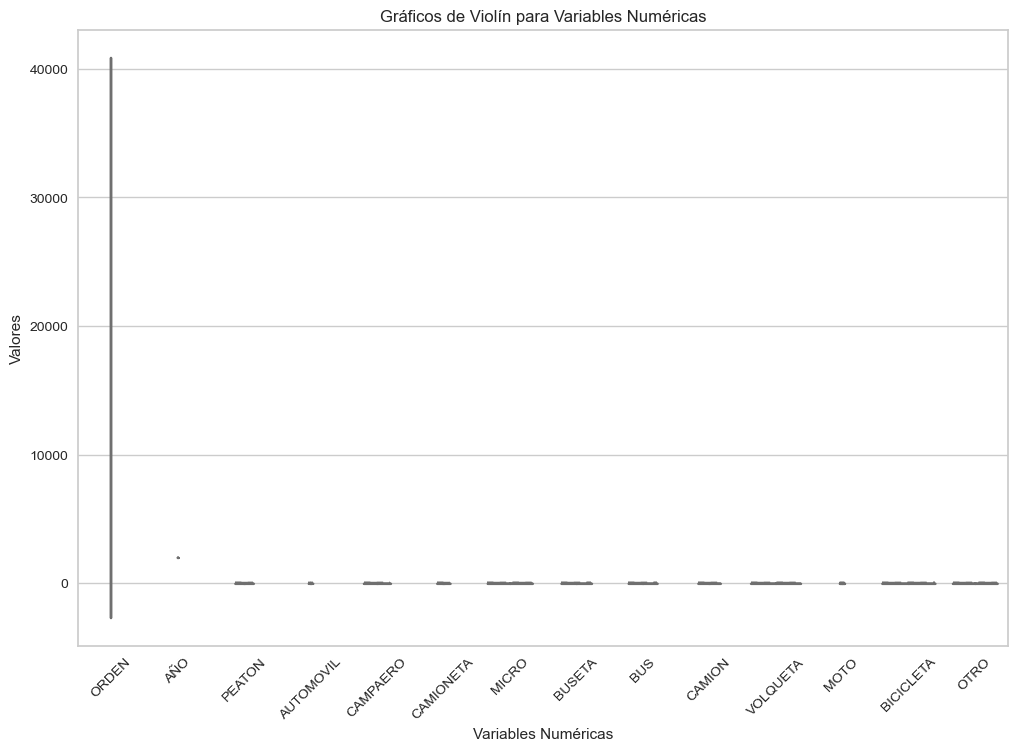

              ORDEN           AÑO       PEATON     AUTOMOVIL      CAMPAERO  \
count  38197.000000  38197.000000  38197.00000  38197.000000  38197.000000   
mean   19099.000000   2016.480430      0.10472      0.786292      0.060947   
std    11026.668453      3.063243      0.33937      0.743994      0.245928   
min        1.000000   2012.000000      0.00000      0.000000      0.000000   
25%     9550.000000   2014.000000      0.00000      0.000000      0.000000   
50%    19099.000000   2016.000000      0.00000      1.000000      0.000000   
75%    28648.000000   2019.000000      0.00000      1.000000      0.000000   
max    38197.000000   2023.000000      7.00000     29.000000      2.000000   

          CAMIONETA         MICRO        BUSETA           BUS        CAMION  \
count  38197.000000  38197.000000  38197.000000  38197.000000  38197.000000   
mean       0.197555      0.020290      0.044061      0.048198      0.083279   
std        0.432211      0.141916      0.211639      0.21830

In [296]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualizar_valores_atipicos(data, numeric_variables):
    print("Análisis de Valores Atípicos en Variables Numéricas:")
    print("-----------------------------------------------------")

    # Gráficos de violín para identificar valores atípicos
    plt.figure(figsize=(12, 8))
    sns.violinplot(data=data[numeric_variables], inner="quartile", palette="pastel")
    plt.title('Gráficos de Violín para Variables Numéricas')
    plt.xlabel('Variables Numéricas')
    plt.ylabel('Valores')
    plt.xticks(rotation=45)
    plt.show()

    # Estadísticas descriptivas para identificar valores atípicos
    descriptive_stats = data[numeric_variables].describe()
    print(descriptive_stats)
    print()  # Agrega un salto de línea al final de cada impresión

    # Identificación de valores atípicos basados en percentiles
    print('\033[1m' + 'Valores atípicos basados en percentiles' + '\033[0m')
    outliers = {}
    for column in numeric_variables:
        Q1, Q3 = descriptive_stats.loc[['25%', '75%'], column]
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        print()  # Agrega un salto de línea al final de cada impresión

    # Imprimir los valores atípicos encontrados
    print('\033[1m' + 'Los valores atípicos encontrados' + '\033[0m')
    for column, outlier_data in outliers.items():
        print(f"Valores atípicos en la variable '{column}':")
        print(outlier_data)
        print()

# Ejemplo de uso
numeric_variables = ['ORDEN', 'AÑO', 'PEATON', 'AUTOMOVIL', 'CAMPAERO', 'CAMIONETA', 'MICRO', 'BUSETA', 'BUS', 'CAMION', 'VOLQUETA', 'MOTO', 'BICICLETA', 'OTRO']
visualizar_valores_atipicos(data, numeric_variables)

## Valores atipicos en variables categoricas

In [297]:
def detectar_anomalias_sintacticas(data, categorical_variables):
    print("Detección de Anomalías Sintácticas en Variables Categóricas:")
    print("-----------------------------------------------------------")

    # Definir una función para identificar anomalías sintácticas o tipográficas
    def identify_typo_anomalies(column):
        unique_values = data[column].unique()
        typo_anomalies = [value for value in unique_values if isinstance(value, str) and any(char.isdigit() for char in value)]
        return typo_anomalies

    # Identificar anomalías en cada variable categórica
    for column in categorical_variables:
        anomalies = identify_typo_anomalies(column)
        if anomalies:
            print(f"Anomalías en la variable '{column}':")
            print(anomalies)
            print()

categorical_variables = ['FECHA', 'MES', 'DÍA', 'GRAVEDAD', 'VIA 1', 'BARRIO', 'HORA', 'ENTIDAD', 'nombrecomuna', 'Propietario de Vehículo', 'DIURNIO/NOCTURNO', 'HORA RESTRICCION MOTO']
detectar_anomalias_sintacticas(data, categorical_variables)

Detección de Anomalías Sintácticas en Variables Categóricas:
-----------------------------------------------------------
Anomalías en la variable 'MES':
['01. Enero', '02. Febrero', '03. Marzo', '04. Abril', '05. Mayo', '06. Junio', '07. Julio', '08. Agosto', '09. Septiembre', '10. Octubre', '11. Noviembre', '12. Diciembre']

Anomalías en la variable 'DÍA':
['07. Domingo', '01. Lunes', '02. Martes', '03. Miercoles', '04. Jueves', '05. Viernes', '06. Sabado']

Anomalías en la variable 'VIA 1':
['CALLE 45 VIA CHIMITA', 'DIAGONAL 15', 'AVENIDA 89', 'TRANSVERSAL 28', 'TRANSVERSAL 93', 'TRANSVERSAL 24', 'AVENIDA 15 N', 'DIAGONAL 32', 'TRANSVERSAL 92', 'AVENIDA 42', 'DIAGONAL 105', 'TRANSVERSAL 72', 'AVENIDA 61', 'TRANSVERSAL 112', 'AVENIDA 88', 'AVENIDA 87', 'DIAGONAL 14', 'CL 45 VIA CHIMITA', 'DIAGONAL 31', 'DIAGONAL 13', 'TRANSVERSAL  93', 'TRANSVERSA 89', 'CALLE 45 CHIMITA', 'TRANSVERSAL 65', 'DIAGONAL 20', 'DIAGONAL 11', 'DIAGONAL 64', 'CARRERA 21', 'CARRERA 9', 'CARREERA 27', 'CALLE 3'

# Análisis del DataFrame

## Variable Hipotesis "GRAVEDAD"

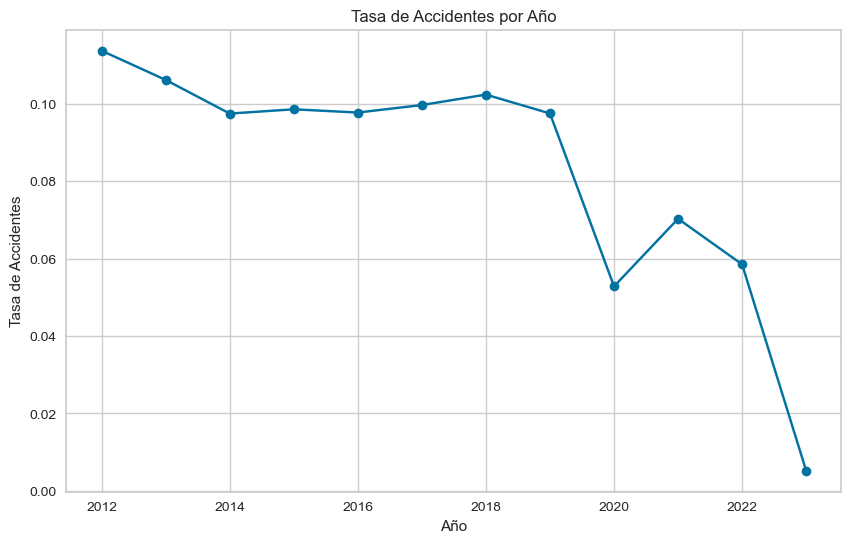

In [298]:
import matplotlib.pyplot as plt

# Calcular la tasa de accidentes por año
tasa_accidentes = data['AÑO'].value_counts(normalize=True).sort_index()

# Gráfico de líneas para la tasa de accidentes por año
plt.figure(figsize=(10, 6))
plt.plot(tasa_accidentes.index, tasa_accidentes.values, marker='o', linestyle='-', color='b')
plt.title('Tasa de Accidentes por Año')
plt.xlabel('Año')
plt.ylabel('Tasa de Accidentes')
plt.grid(True)
plt.show()


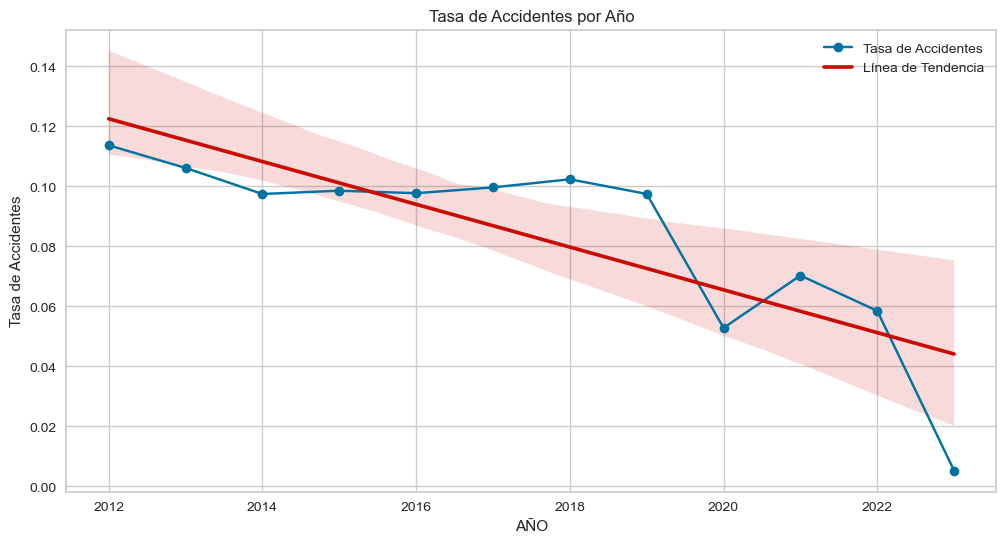

In [299]:
import matplotlib.pyplot as plt
import seaborn as sns  # Para gráficos estadísticos avanzados

# Calcular la tasa de accidentes por año
tasa_accidentes = data['AÑO'].value_counts(normalize=True).sort_index()

# Gráfico de líneas para la tasa de accidentes por año
plt.figure(figsize=(12, 6))
plt.plot(tasa_accidentes.index, tasa_accidentes.values, marker='o', linestyle='-', color='b', label='Tasa de Accidentes')
plt.title('Tasa de Accidentes por Año')
plt.xlabel('Año')
plt.ylabel('Tasa de Accidentes')
plt.grid(True)

# Añadir línea de tendencia (regresión lineal)
sns.regplot(x=tasa_accidentes.index, y=tasa_accidentes.values, scatter=False, color='r', label='Línea de Tendencia')

plt.legend()
plt.show()

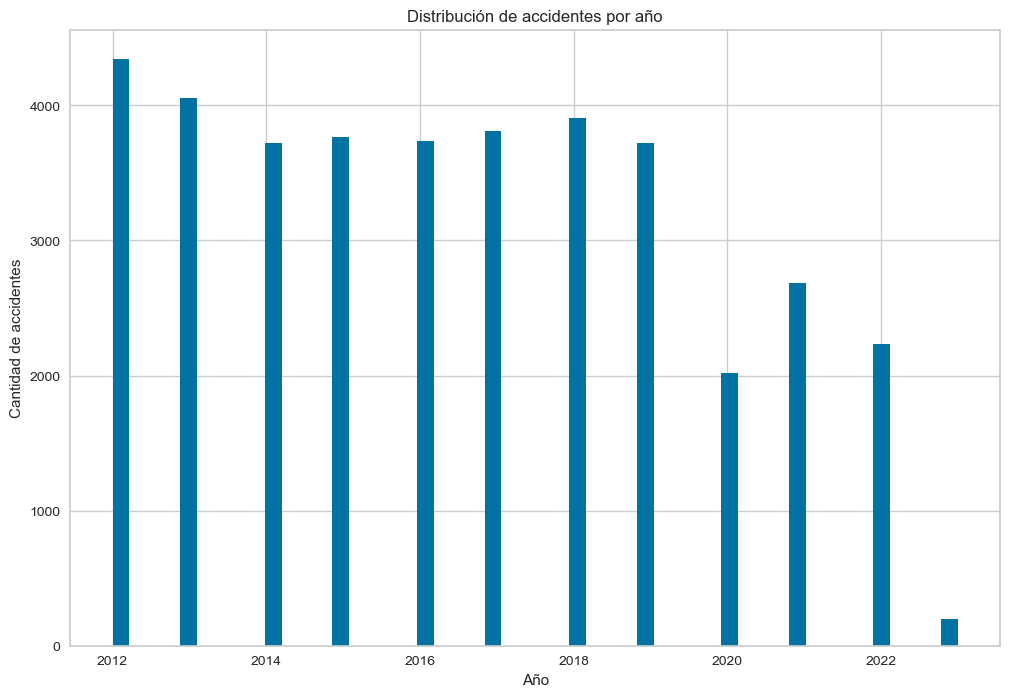

In [300]:
#mediante el siguiente fragmento del codigo podremos graficar la distribución que tienen los accidentes por año
plt.figure(figsize=(12, 8))
data['AÑO'].hist(bins=50)
plt.title('Distribución de accidentes por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de accidentes')
plt.show()

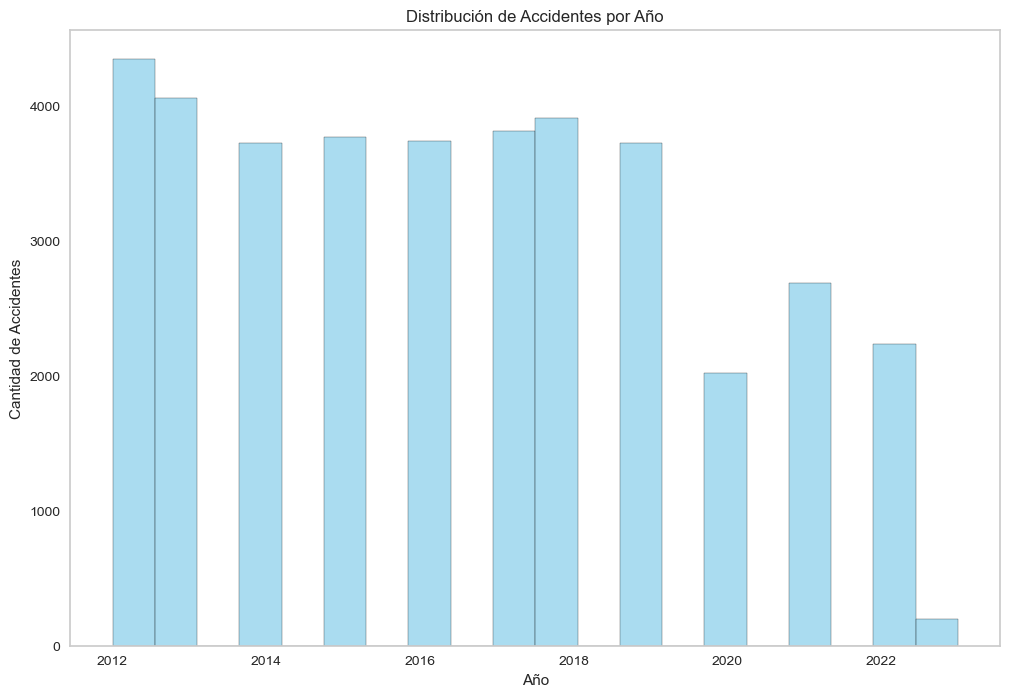

In [301]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Crear histograma
data['AÑO'].hist(bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Añadir etiquetas y título
plt.title('Distribución de Accidentes por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Accidentes')

plt.grid(False)  # Desactivar cuadrícula para mayor claridad
plt.show()


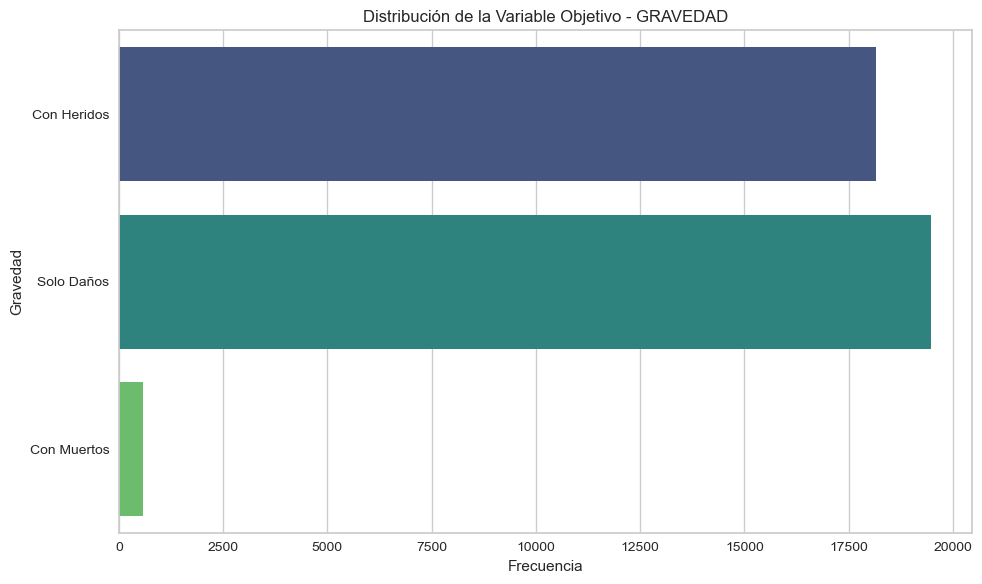

In [302]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualización con gráfico de barras horizontales apiladas
plt.figure(figsize=(10, 6))
sns.countplot(y='GRAVEDAD', data=data, palette='viridis')
plt.title('Distribución de la Variable Objetivo - GRAVEDAD')
plt.xlabel('Frecuencia')
plt.ylabel('Gravedad')
plt.tight_layout()
plt.show()


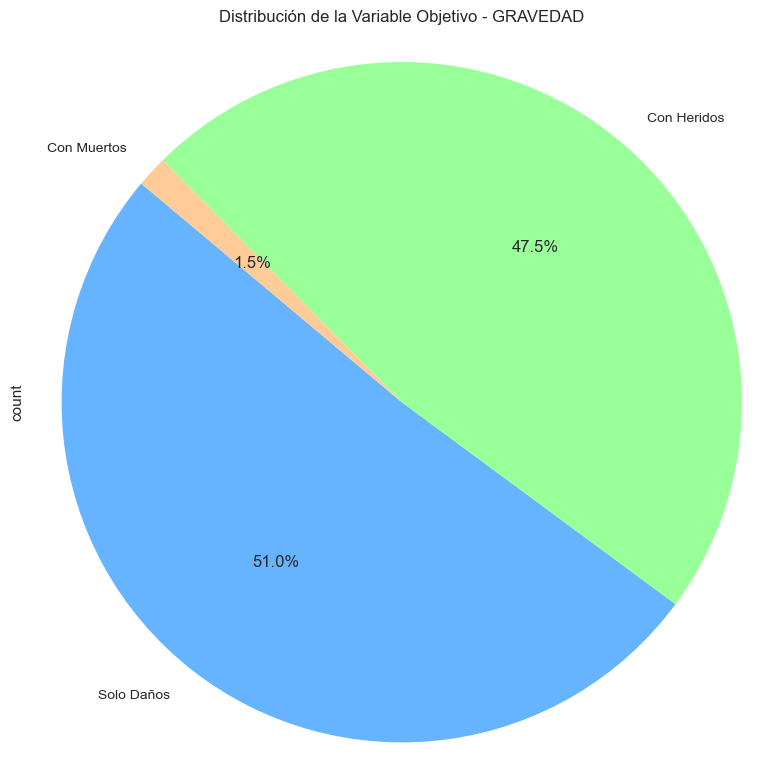

In [303]:
import matplotlib.pyplot as plt

# Visualización con gráfico circular (pastel)
plt.figure(figsize=(8, 8))
data['GRAVEDAD'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99','#ffcc99'])
plt.title('Distribución de la Variable Objetivo - GRAVEDAD')
plt.axis('equal')  # Para asegurarse de que el pastel sea un círculo
plt.tight_layout()
plt.show()


# Exploracion de variables numericas

La exploración de variables numéricas en un dataframe permite comprender la distribución, tendencias y relaciones entre las variables, proporcionando información crucial para análisis estadísticos y modelado. Ayuda a identificar patrones, valores atípicos y a obtener una visión general de la estructura y comportamiento de los datos numéricos.


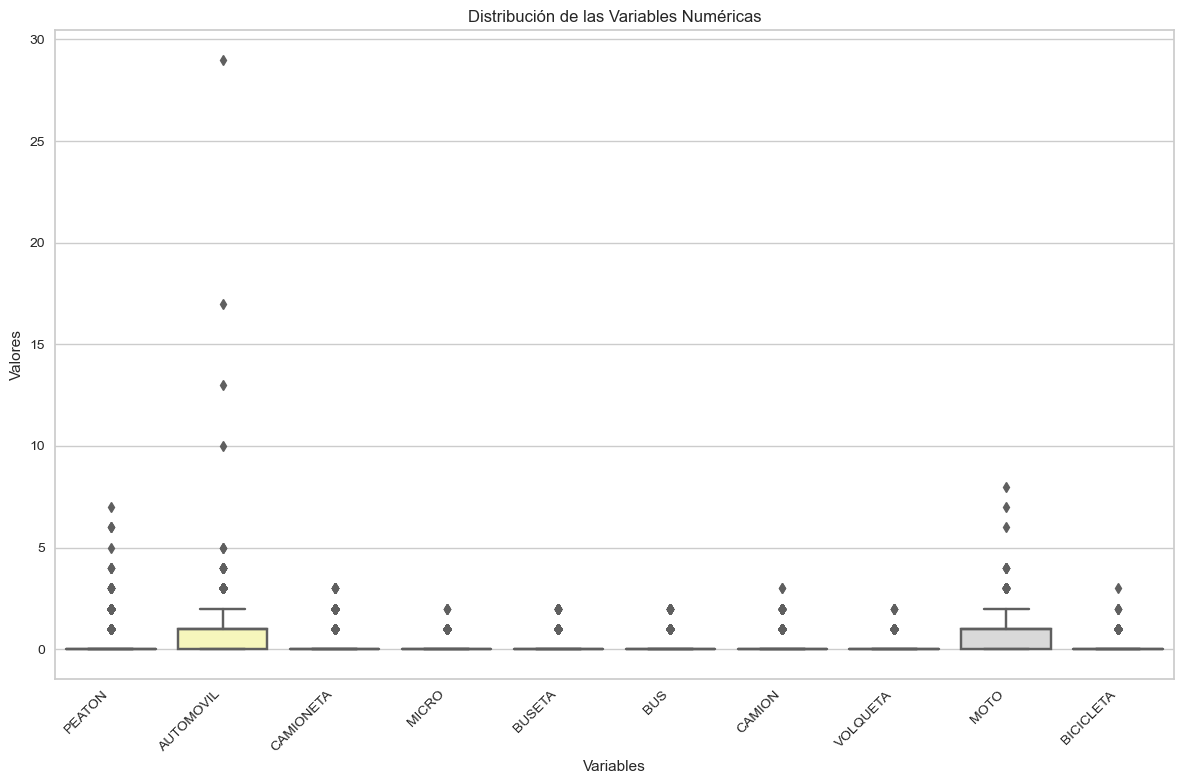

In [229]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_variables = ['PEATON', 'AUTOMOVIL', 'CAMIONETA', 'MICRO', 'BUSETA', 'BUS', 'CAMION', 'VOLQUETA', 'MOTO', 'BICICLETA']

# Visualización con boxplots
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[numeric_variables], palette='Set3')
plt.title('Distribución de las Variables Numéricas')
plt.xlabel('Variables')
plt.ylabel('Valores')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


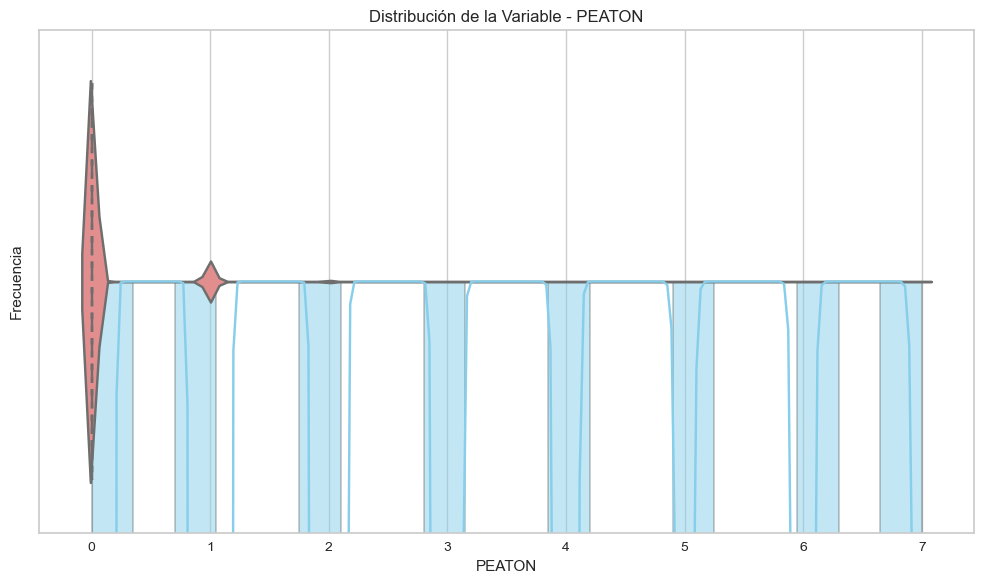

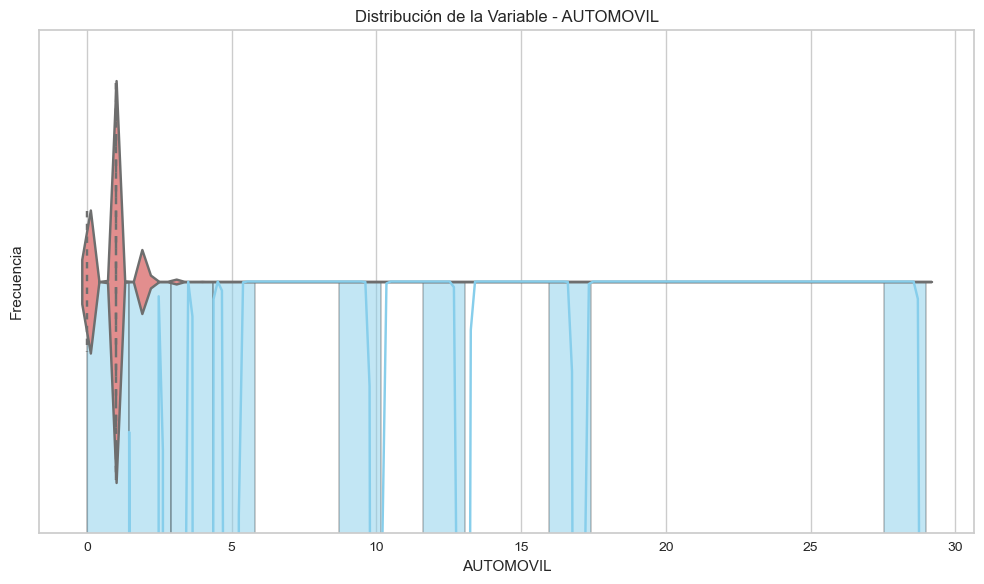

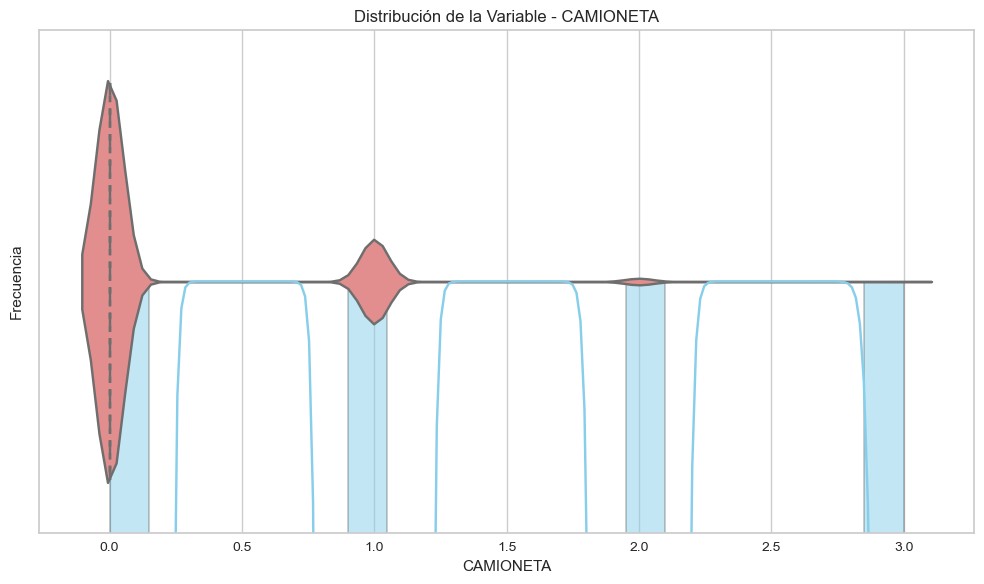

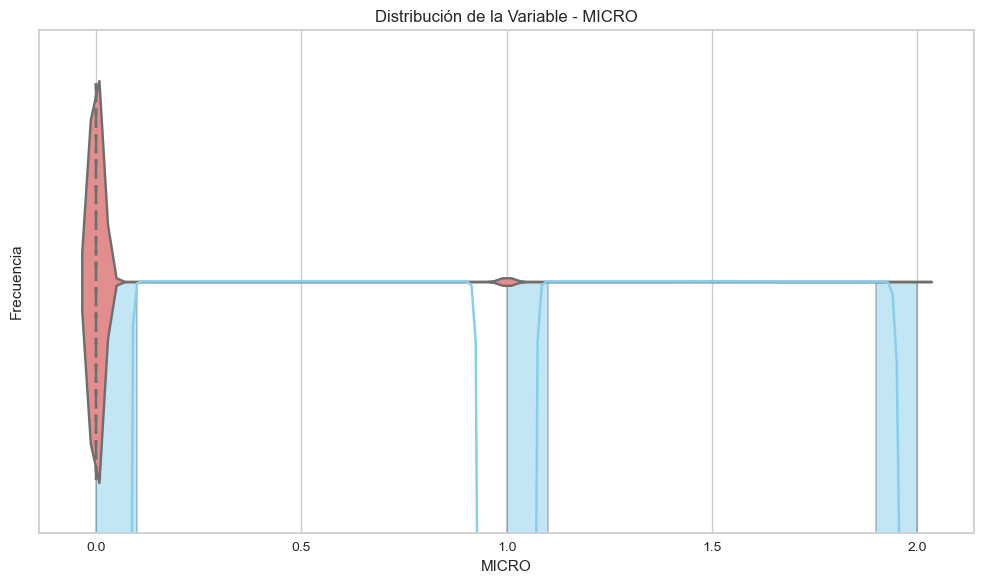

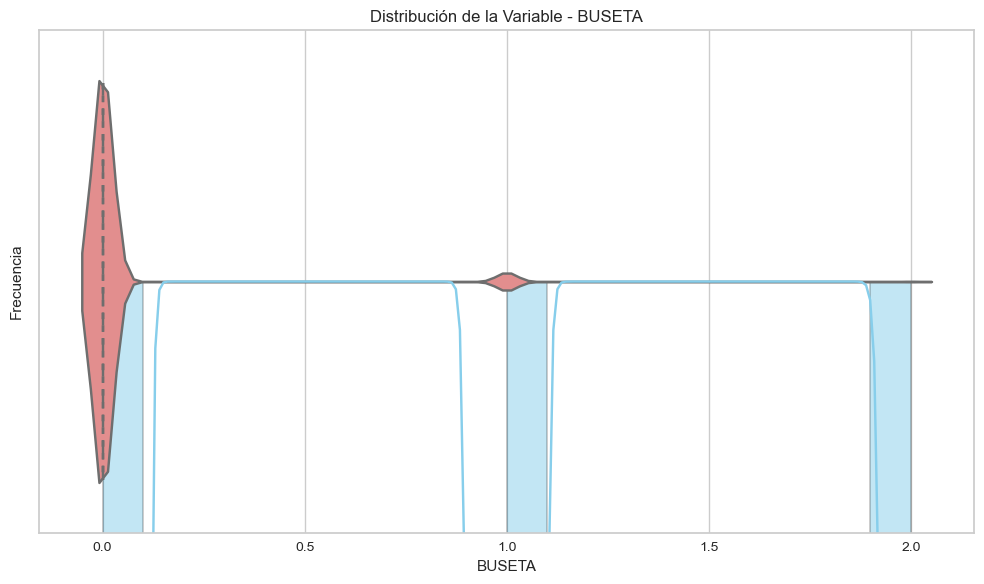

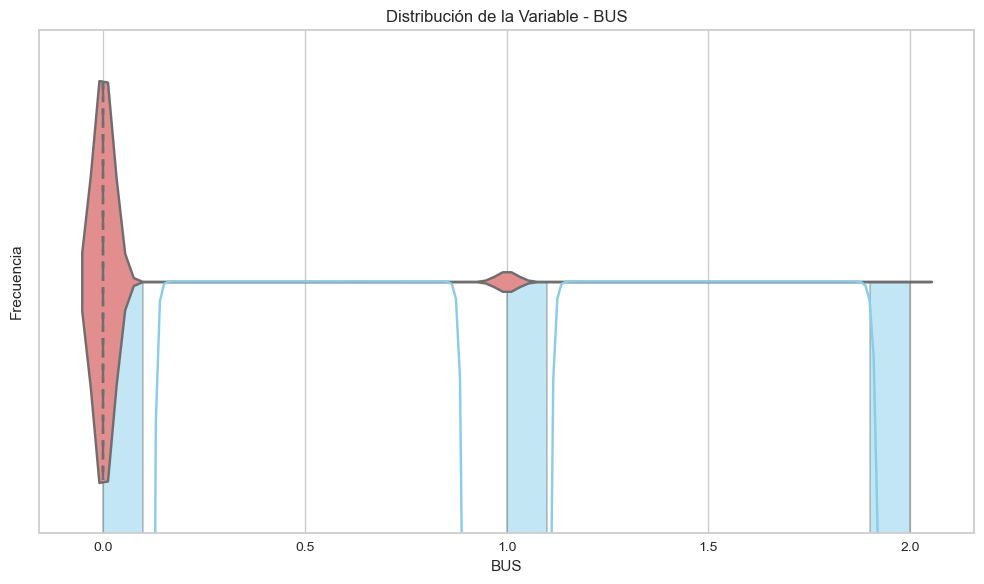

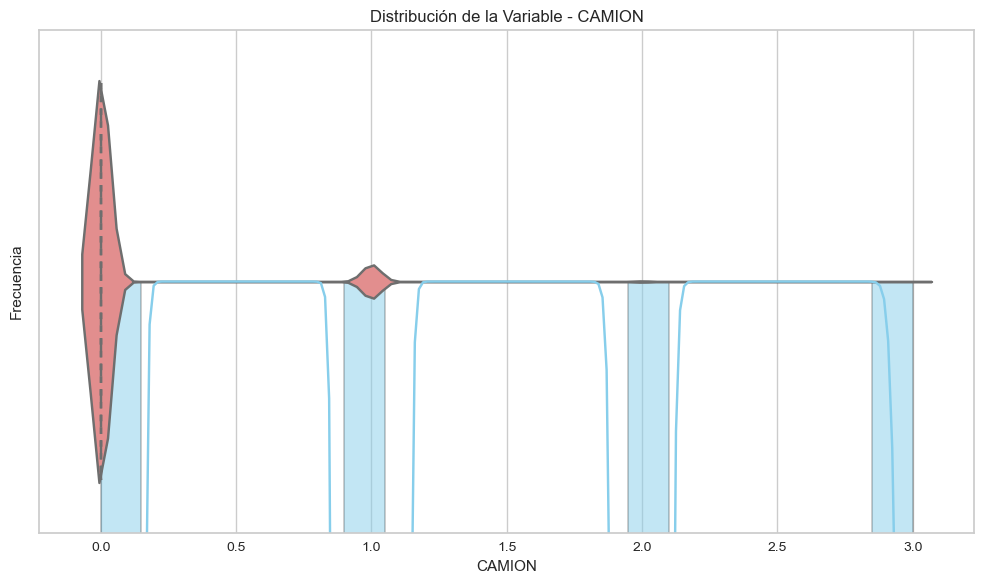

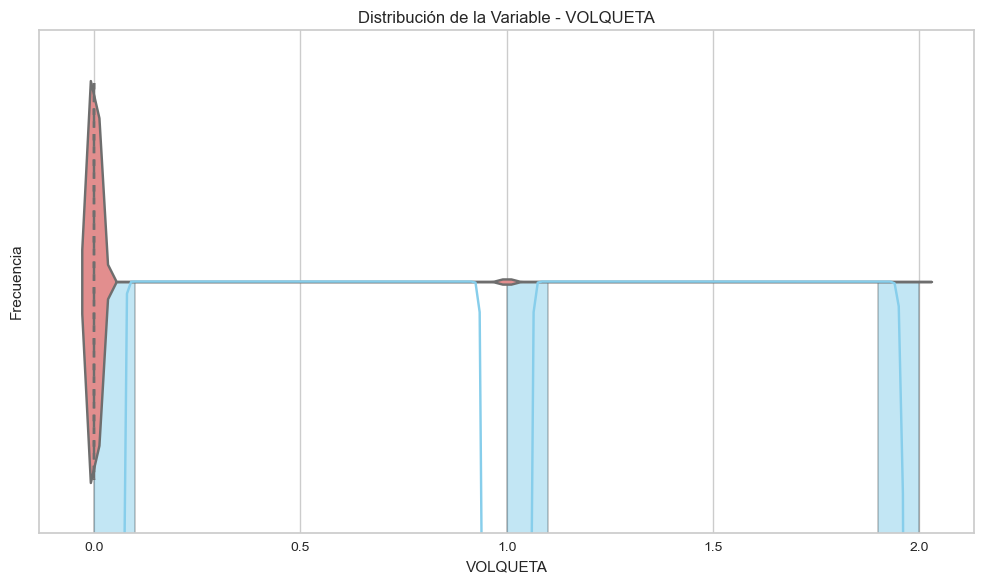

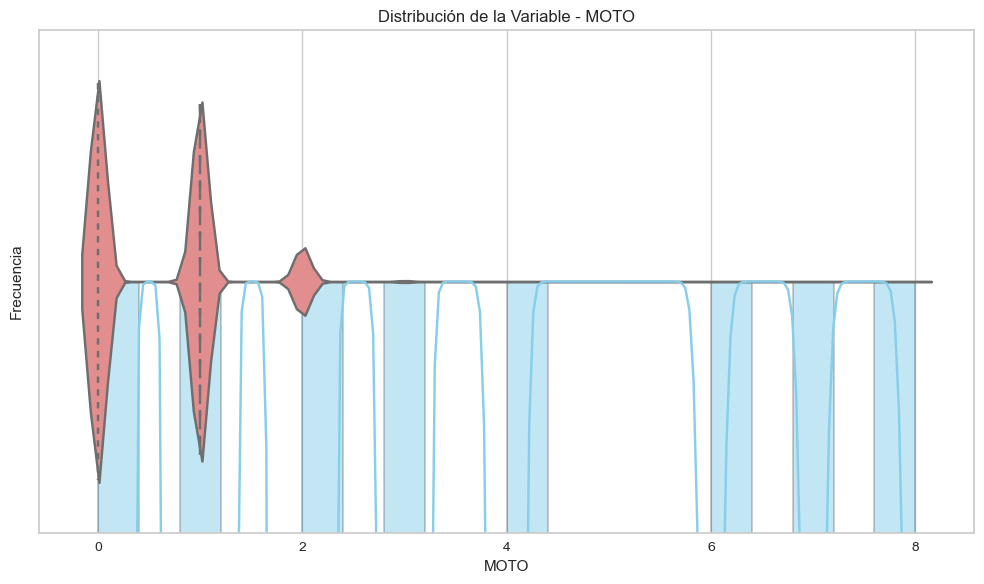

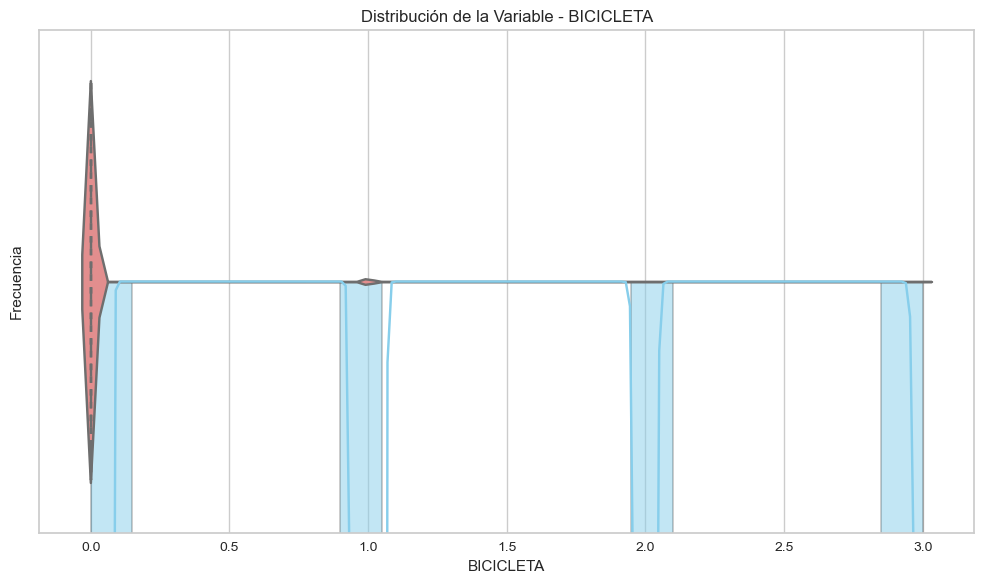

            PEATON     AUTOMOVIL     CAMIONETA         MICRO        BUSETA  \
count  38197.00000  38197.000000  38197.000000  38197.000000  38197.000000   
mean       0.10472      0.786292      0.197555      0.020290      0.044061   
std        0.33937      0.743994      0.432211      0.141916      0.211639   
min        0.00000      0.000000      0.000000      0.000000      0.000000   
25%        0.00000      0.000000      0.000000      0.000000      0.000000   
50%        0.00000      1.000000      0.000000      0.000000      0.000000   
75%        0.00000      1.000000      0.000000      0.000000      0.000000   
max        7.00000     29.000000      3.000000      2.000000      2.000000   

                BUS        CAMION      VOLQUETA          MOTO     BICICLETA  
count  38197.000000  38197.000000  38197.000000  38197.000000  38197.000000  
mean       0.048198      0.083279      0.014242      0.611697      0.017384  
std        0.218303      0.287543      0.120025      0.652550  

In [304]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_variables = ['PEATON', 'AUTOMOVIL', 'CAMIONETA', 'MICRO', 'BUSETA', 'BUS', 'CAMION', 'VOLQUETA', 'MOTO', 'BICICLETA']

# Visualización con gráficos de densidad y violín
for column in numeric_variables:
    plt.figure(figsize=(10, 6))
    
    # Gráfico de densidad
    sns.histplot(data[column], kde=True, bins=20, color='skyblue', edgecolor='k')
    
    # Gráfico de violín
    sns.violinplot(x=data[column], color='lightcoral', inner='quartile')
    
    plt.title(f'Distribución de la Variable - {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()

# Cálculo de estadísticas descriptivas
statistics = data[numeric_variables].describe()
print(statistics)


Cantidad de Accidentes por Tipo de Vehículo:

En promedio, el tipo de vehículo más involucrado es el automóvil, seguido por la moto y la camioneta.
La mayoría de las variables (PEATON, AUTOMOVIL, CAMIONETA, MICRO, BUSETA, BUS, CAMION, VOLQUETA, MOTO, BICICLETA) tienen una mediana de 0, lo que sugiere que la mayoría de las observaciones tienen 0 incidentes para cada tipo de vehículo.
Rango de Datos:

La variable con la cantidad máxima más alta es AUTOMOVIL, con un valor máximo de 29.
Las variables BUS, CAMION, y MOTO también tienen valores máximos superiores a 2, lo que indica que hay algunas observaciones con un número considerable de incidentes.
Desviación Estándar:

La desviación estándar proporciona una medida de la dispersión de los datos. Variables como MOTO y AUTOMOVIL tienen desviaciones estándar relativamente altas, indicando una mayor variabilidad en la cantidad de incidentes.
Percentiles:

Los percentiles muestran cómo se distribuyen los datos. Por ejemplo, el 75% de las observaciones en las variables MOTO y AUTOMOVIL tienen 1 incidente o menos.

## Eliminación de variables que no influyen en el modelo

In [305]:
data = data.drop(['FECHA', 'MES', 'DÍA', 'VIA 1', 'BARRIO', 'HORA', 'ENTIDAD', 'nombrecomuna', 'Propietario de Vehículo', 'DIURNIO/NOCTURNO', 'HORA RESTRICCION MOTO', 'ORDEN'], axis='columns')
data.head(10)

,AÑO,GRAVEDAD,PEATON,AUTOMOVIL,CAMPAERO,CAMIONETA,MICRO,BUSETA,BUS,CAMION,VOLQUETA,MOTO,BICICLETA,OTRO
0,2012,Con Heridos,0,1,0,0,0,0,0,0,0,0,0,0
1,2012,Solo Daños,0,1,0,1,0,0,0,0,0,0,0,0
2,2012,Solo Daños,0,0,0,1,0,0,0,0,0,0,0,0
3,2012,Solo Daños,0,1,0,1,0,0,0,0,0,0,0,0
4,2012,Con Heridos,1,0,0,0,0,0,0,0,0,1,0,0
5,2012,Solo Daños,0,1,0,0,0,0,0,0,0,1,0,0
6,2012,Con Heridos,1,0,0,0,1,0,0,0,0,0,0,0
7,2012,Solo Daños,0,0,0,2,0,0,0,0,0,0,0,0
8,2012,Solo Daños,0,1,0,0,0,0,0,0,0,0,0,1
9,2012,Con Heridos,0,1,0,0,0,0,0,0,0,0,0,0


# Relacion entre variables
La relación entre variables numéricas proporciona información sobre cómo cambian conjuntamente dos o más variables. Ayuda a identificar patrones, asociaciones o correlaciones entre ellas, lo que es crucial para entender las interacciones y comportamientos dentro de un conjunto de datos.

C:\Users\teran\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


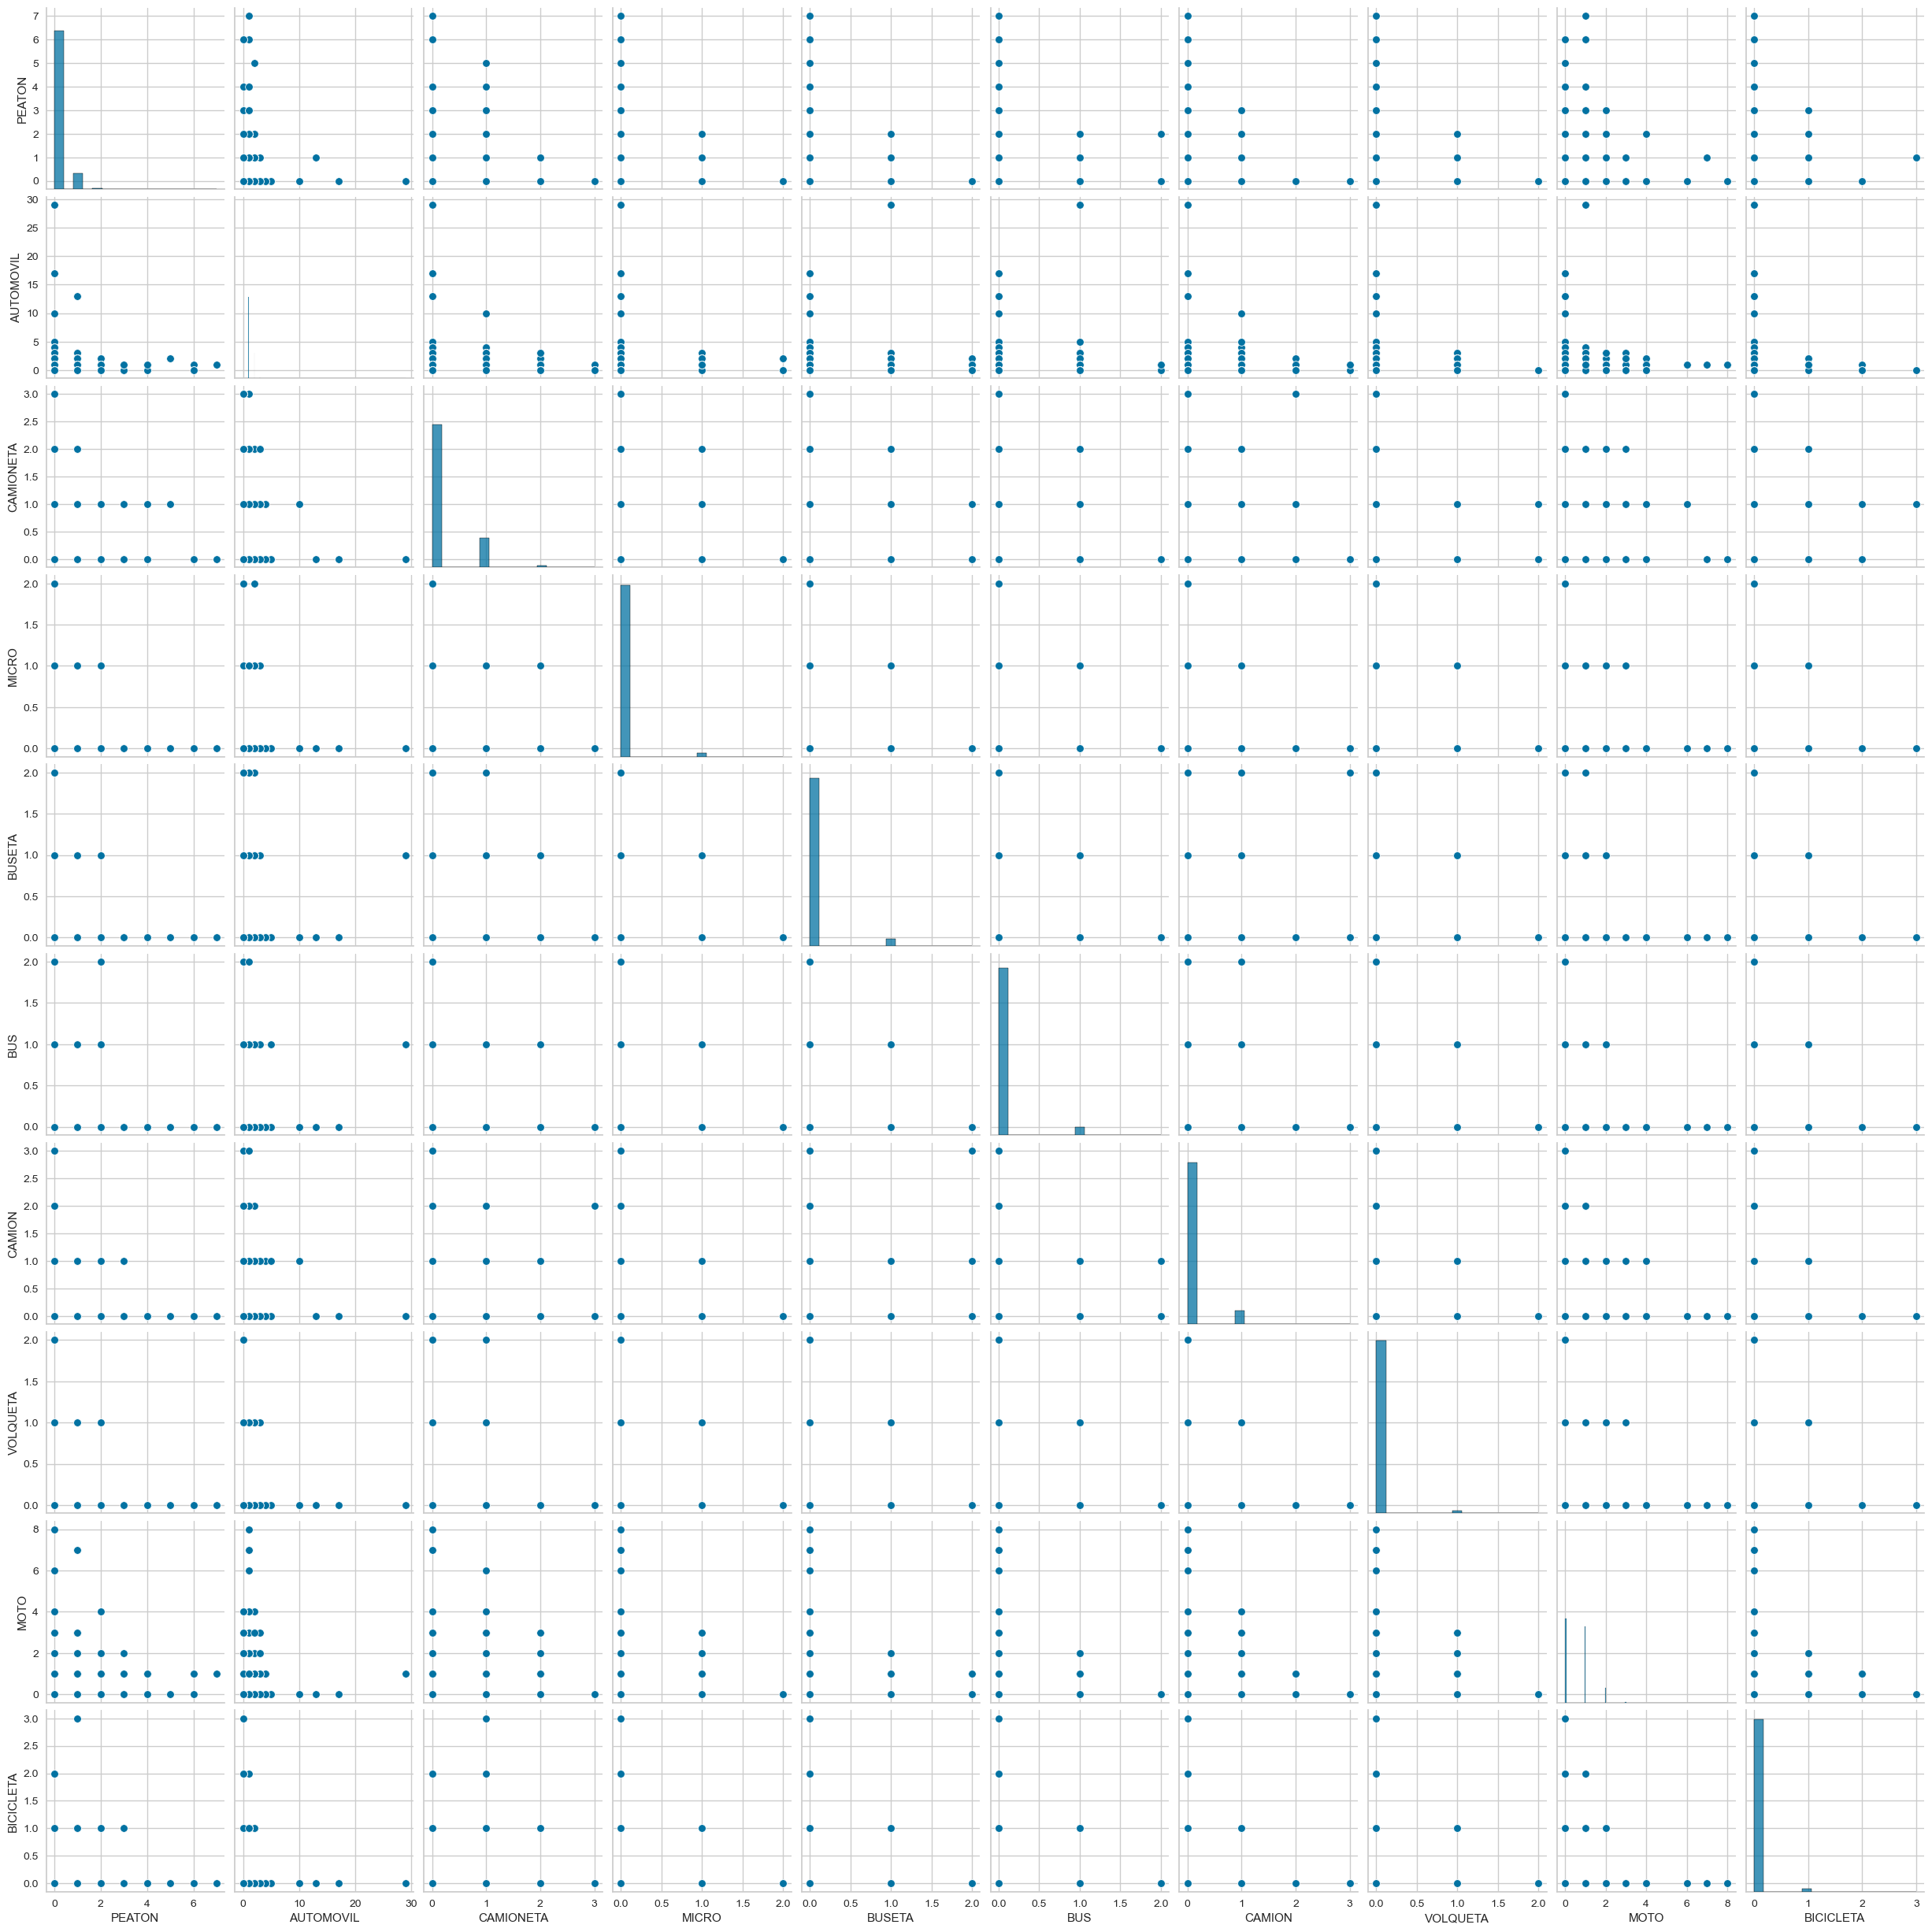

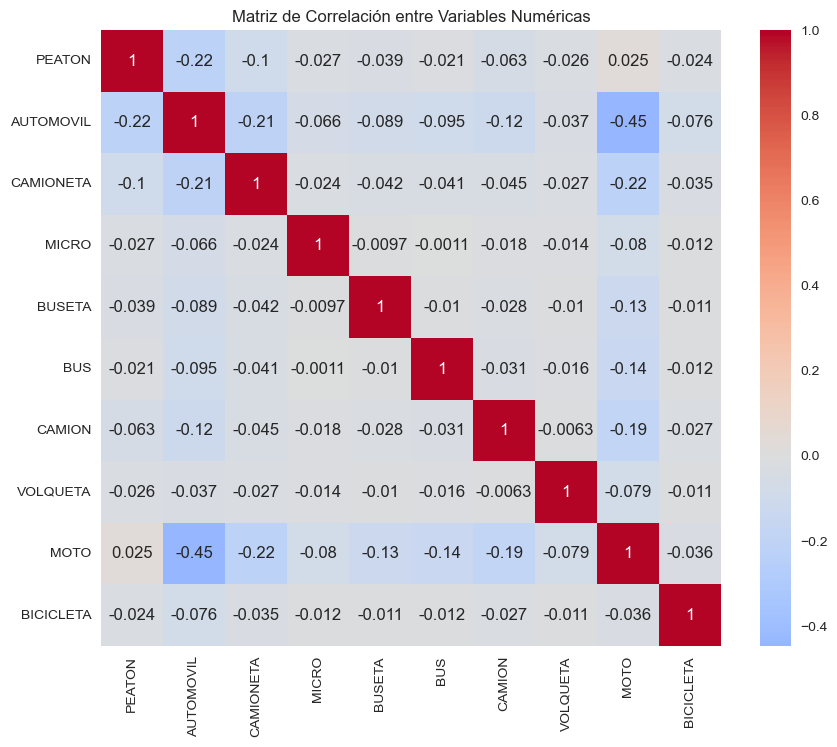

In [306]:
# Variables numéricas
numeric_variables = ['PEATON', 'AUTOMOVIL', 'CAMIONETA', 'MICRO', 'BUSETA', 'BUS', 'CAMION', 'VOLQUETA', 'MOTO', 'BICICLETA']

# Gráficos de dispersión
sns.pairplot(data[numeric_variables])
plt.show()

# Matriz de correlación
correlation_matrix = data[numeric_variables].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()


Al revisar la grafica de la matriz de correlación podemos darnos cuenta que las variables no estan directamente correlacionadas esto quiere decir que las variables son independientes una de otra, esto es importante detallarlo ya que en base a las correlaciones de variables podremos considerar modelos de analisis 

# Convertir variables objetivo en numéricas y asignarles etiqueta

Es importante convertir las variables objetivo a numéricas y agregarles etiquetas para facilitar su procesamiento en algoritmos de aprendizaje automático. Los modelos suelen requerir entradas numéricas, y las etiquetas facilitan la interpretación y evaluación del rendimiento del modelo. Además, permite aplicar técnicas estadísticas y métricas de evaluación de manera efectiva.

# Asignando etiquetas a la variable Hipotesis "GRAVEDAD"


In [307]:
from sklearn.preprocessing import LabelEncoder

# Crear un codificador de etiquetas
label_encoder = LabelEncoder()

# Convertir las etiquetas de la variable objetivo en valores numéricos
y_encoded = label_encoder.fit_transform(data['GRAVEDAD'])

# Reemplazar la columna 'GRAVEDAD' con las etiquetas numéricas
data['GRAVEDAD'] = y_encoded


Se acaba de asignar un valor numerico a cada uno de los valores unicos que se encuentran en la variable "GRAVEDAD"
de tal forma que se puedan identificar para sus analisis:
    "Con Muertos": 0
    "Con Heridos": 1
    "Solo Daños": 2

In [312]:
from sklearn.model_selection import train_test_split
X= data.drop('GRAVEDAD', axis=1) 
y = data['GRAVEDAD']

#Ahora eempezamos a construir el modelo, separamos los datos de entrenamiento y pruebas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26737 entries, 9390 to 15795
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   AÑO        26737 non-null  int64
 1   PEATON     26737 non-null  int64
 2   AUTOMOVIL  26737 non-null  int64
 3   CAMPAERO   26737 non-null  int64
 4   CAMIONETA  26737 non-null  int64
 5   MICRO      26737 non-null  int64
 6   BUSETA     26737 non-null  int64
 7   BUS        26737 non-null  int64
 8   CAMION     26737 non-null  int64
 9   VOLQUETA   26737 non-null  int64
 10  MOTO       26737 non-null  int64
 11  BICICLETA  26737 non-null  int64
 12  OTRO       26737 non-null  int64
dtypes: int64(13)
memory usage: 2.9 MB


In [313]:
import pandas as pd

# Supongamos que 'df' es tu DataFrame y 'GRAVEDAD' es la columna que deseas convertir
# Puedes verificar el tipo de datos actual con df['GRAVEDAD'].dtype

# Convertir a int64
data['GRAVEDAD'] = data['GRAVEDAD'].astype('int64')

# Verificar el nuevo tipo de datos
print(data['GRAVEDAD'].dtype)

int64


In [314]:
#Verifico los datos faltantes del dataset o nulos
data.isnull().sum()

AÑO          0
GRAVEDAD     0
PEATON       0
AUTOMOVIL    0
CAMPAERO     0
CAMIONETA    0
MICRO        0
BUSETA       0
BUS          0
CAMION       0
VOLQUETA     0
MOTO         0
BICICLETA    0
OTRO         0
dtype: int64

In [315]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38197 entries, 0 to 38196
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   AÑO        38197 non-null  int64
 1   GRAVEDAD   38197 non-null  int64
 2   PEATON     38197 non-null  int64
 3   AUTOMOVIL  38197 non-null  int64
 4   CAMPAERO   38197 non-null  int64
 5   CAMIONETA  38197 non-null  int64
 6   MICRO      38197 non-null  int64
 7   BUSETA     38197 non-null  int64
 8   BUS        38197 non-null  int64
 9   CAMION     38197 non-null  int64
 10  VOLQUETA   38197 non-null  int64
 11  MOTO       38197 non-null  int64
 12  BICICLETA  38197 non-null  int64
 13  OTRO       38197 non-null  int64
dtypes: int64(14)
memory usage: 4.1 MB


## Normalizacion

In [316]:
#Ahora importamos el escalador, instaciamos y transformamos el dataset original
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
X_train_scaled_2 = standard_scaler.fit_transform(X_train)
X_train_scaled_2 = pd.DataFrame(X_train_scaled_2)
X_train_scaled_2.columns = X_train.columns
X_train_scaled_2.head()

,AÑO,PEATON,AUTOMOVIL,CAMPAERO,CAMIONETA,MICRO,BUSETA,BUS,CAMION,VOLQUETA,MOTO,BICICLETA,OTRO
0,-0.811791,-0.311004,1.620063,-0.24476,-0.45622,-0.141127,-0.207897,-0.223573,-0.288047,-0.117361,-0.940961,-0.131194,-0.138924
1,1.472930,-0.311004,-1.049457,-0.24476,-0.45622,-0.141127,-0.207897,-0.223573,-0.288047,-0.117361,0.590944,-0.131194,-0.138924
2,0.820153,-0.311004,0.285303,-0.24476,-0.45622,-0.141127,-0.207897,-0.223573,-0.288047,-0.117361,0.590944,-0.131194,-0.138924
3,1.799319,-0.311004,1.620063,-0.24476,-0.45622,-0.141127,-0.207897,-0.223573,-0.288047,-0.117361,-0.940961,-0.131194,-0.138924
4,-0.811791,-0.311004,0.285303,-0.24476,-0.45622,-0.141127,4.534891,-0.223573,-0.288047,-0.117361,-0.940961,-0.131194,-0.138924


## Reduccion de caracteristicas 

In [317]:
from sklearn.ensemble import RandomForestClassifier

clf_rnd_2 = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
clf_rnd_2.fit(X_train_scaled_2, y_train)

RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)

In [318]:
clf_rnd_2.feature_importances_

array([0.06647119, 0.15226049, 0.14226445, 0.01692994, 0.04965967,
       0.00625202, 0.01374191, 0.01482645, 0.0285695 , 0.00484904,
       0.46580068, 0.0314877 , 0.00688697])

In [319]:
# Podemos extraer que características son más importantes para la correcta clasificación de los datos
feature_importances_2 = {name: score for name, score in zip(list(X_train_scaled_2), clf_rnd_2.feature_importances_)}

In [320]:
feature_importances_sorted_2 = pd.Series(feature_importances_2).sort_values(ascending=False)
feature_importances_sorted_2

MOTO         0.465801
PEATON       0.152260
AUTOMOVIL    0.142264
AÑO          0.066471
CAMIONETA    0.049660
BICICLETA    0.031488
CAMION       0.028569
CAMPAERO     0.016930
BUS          0.014826
BUSETA       0.013742
OTRO         0.006887
MICRO        0.006252
VOLQUETA     0.004849
dtype: float64

In [321]:
feature_importances_sorted_2.sum()

0.9999999999999999

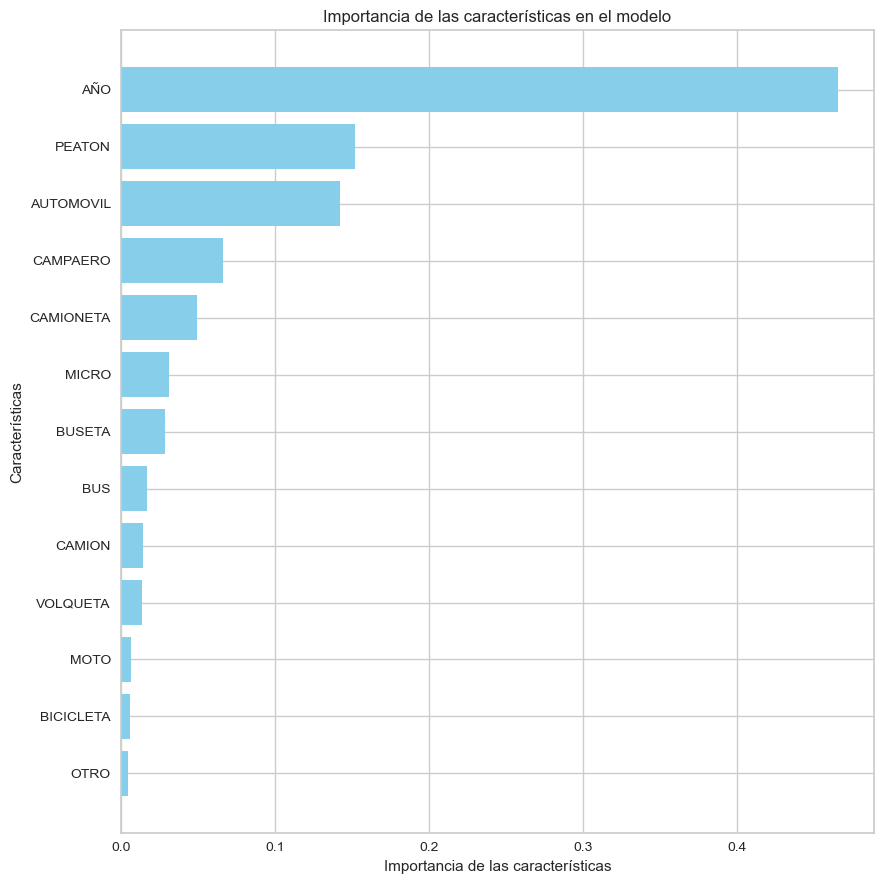

In [322]:
from matplotlib import pyplot as plt
import numpy as np

# Supongamos que feature_importances_sorted es la lista de importancias de características que quieres trazar
# y X_train_scaled.columns es la lista de nombres de características.

# Crear un DataFrame para el gráfico
for_plot = pd.DataFrame({'x_axis': X_train_scaled_2.columns, 'y_axis': feature_importances_sorted_2}).sort_values(by='y_axis', ascending=True)

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(9, 9))

# Graficar las barras horizontales
ax.barh(for_plot['x_axis'], for_plot['y_axis'], color='skyblue')

# Ajustar la apariencia de los ejes
ax.set_xlabel('Importancia de las características')
ax.set_ylabel('Características')
ax.set_title('Importancia de las características en el modelo')

# Ajustar el diseño para evitar el solapamiento
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [323]:
#Extraemos las 10 caracteristicas con mas relevancia para el algoritmo
X_reduced_2 = X_train_scaled_2[list(feature_importances_sorted_2.head(10).index)].copy()
X_reduced_2

,MOTO,PEATON,AUTOMOVIL,AÑO,CAMIONETA,BICICLETA,CAMION,CAMPAERO,BUS,BUSETA
0,-0.940961,-0.311004,1.620063,-0.811791,-0.456220,-0.131194,-0.288047,-0.24476,-0.223573,-0.207897
1,0.590944,-0.311004,-1.049457,1.472930,-0.456220,-0.131194,-0.288047,-0.24476,-0.223573,-0.207897
2,0.590944,-0.311004,0.285303,0.820153,-0.456220,-0.131194,-0.288047,-0.24476,-0.223573,-0.207897
3,-0.940961,-0.311004,1.620063,1.799319,-0.456220,-0.131194,-0.288047,-0.24476,-0.223573,-0.207897
4,-0.940961,-0.311004,0.285303,-0.811791,-0.456220,-0.131194,-0.288047,-0.24476,-0.223573,4.534891
...,...,...,...,...,...,...,...,...,...,...
26732,0.590944,-0.311004,0.285303,-1.138180,-0.456220,-0.131194,-0.288047,-0.24476,-0.223573,-0.207897
26733,-0.940961,-0.311004,1.620063,-0.811791,-0.456220,-0.131194,-0.288047,-0.24476,-0.223573,-0.207897
26734,2.122848,-0.311004,-1.049457,2.125708,-0.456220,-0.131194,-0.288047,-0.24476,-0.223573,-0.207897
26735,-0.940961,2.647129,-1.049457,-1.464568,1.863665,-0.131194,-0.288047,-0.24476,-0.223573,-0.207897


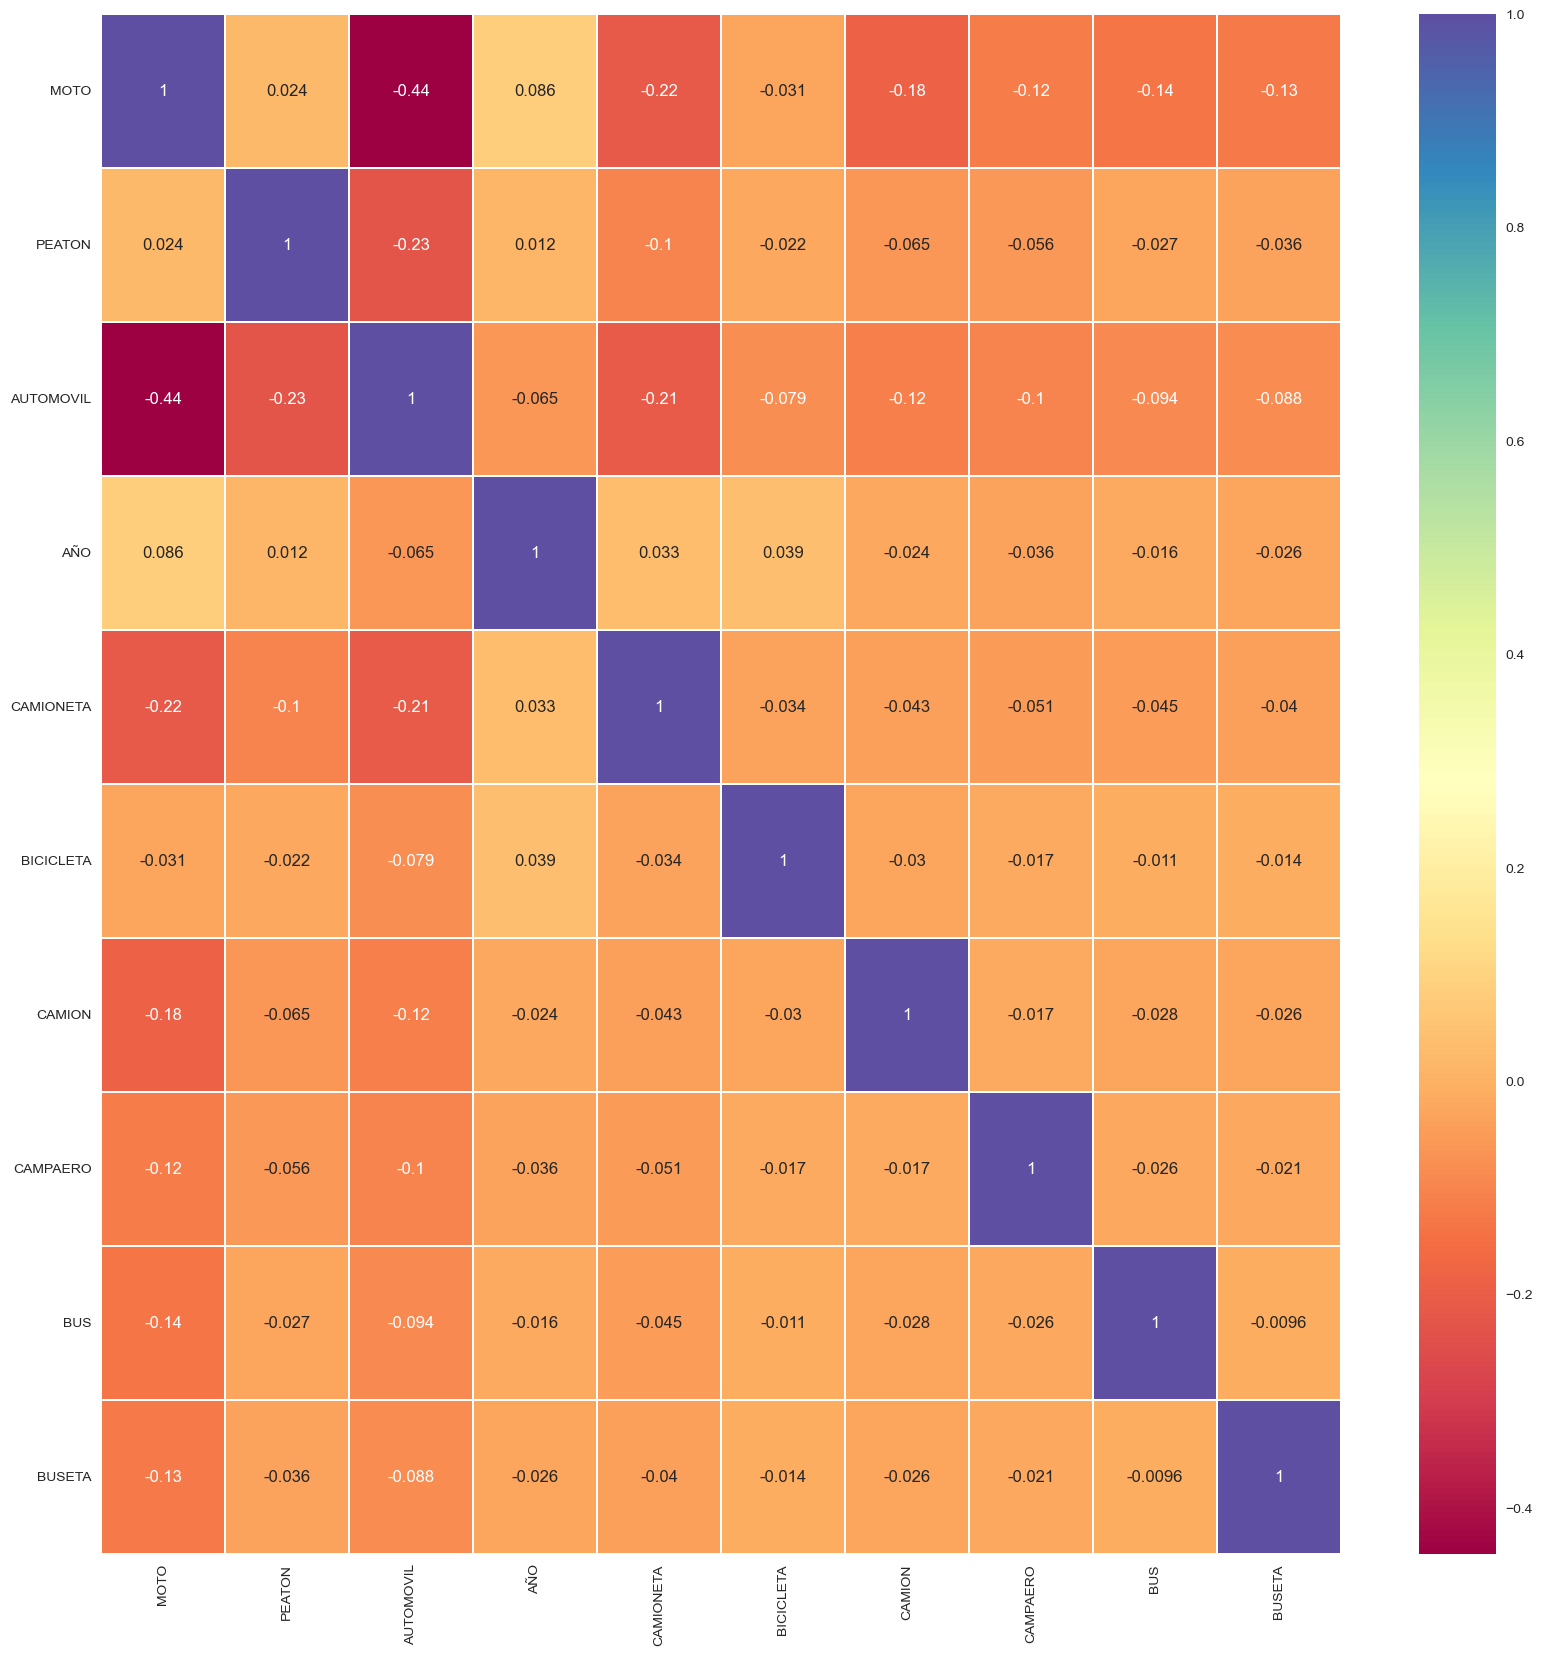

In [324]:
# Creating a correlation heatmap
sns.heatmap(X_reduced_2.corr(),annot=True, cmap='Spectral', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.show()

In [325]:
#NO esta desbalanceado, no necesita balanceo
y_train.value_counts()

GRAVEDAD
2    13575
0    12769
1      393
Name: count, dtype: int64

In [326]:
X_reduced_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26737 entries, 0 to 26736
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MOTO       26737 non-null  float64
 1   PEATON     26737 non-null  float64
 2   AUTOMOVIL  26737 non-null  float64
 3   AÑO        26737 non-null  float64
 4   CAMIONETA  26737 non-null  float64
 5   BICICLETA  26737 non-null  float64
 6   CAMION     26737 non-null  float64
 7   CAMPAERO   26737 non-null  float64
 8   BUS        26737 non-null  float64
 9   BUSETA     26737 non-null  float64
dtypes: float64(10)
memory usage: 2.0 MB


In [327]:
print('#### Mezclar la base de datos###############')
#Mezclar la base de datos
X_reduced_2 = X_reduced_2.sample(frac=1).reset_index(drop=True)
X_reduced_2.head(10)

#### Mezclar la base de datos###############


,MOTO,PEATON,AUTOMOVIL,AÑO,CAMIONETA,BICICLETA,CAMION,CAMPAERO,BUS,BUSETA
0,0.590944,-0.311004,0.285303,1.799319,-0.45622,-0.131194,-0.288047,-0.244760,-0.223573,-0.207897
1,2.122848,-0.311004,-1.049457,-0.811791,-0.45622,-0.131194,-0.288047,-0.244760,-0.223573,-0.207897
2,0.590944,-0.311004,0.285303,0.167375,-0.45622,-0.131194,-0.288047,-0.244760,-0.223573,-0.207897
3,0.590944,-0.311004,0.285303,0.167375,-0.45622,-0.131194,-0.288047,-0.244760,-0.223573,-0.207897
4,-0.940961,2.647129,0.285303,0.820153,-0.45622,-0.131194,-0.288047,-0.244760,-0.223573,-0.207897
5,2.122848,-0.311004,-1.049457,-0.811791,-0.45622,-0.131194,-0.288047,-0.244760,-0.223573,-0.207897
6,2.122848,-0.311004,-1.049457,1.799319,-0.45622,-0.131194,-0.288047,-0.244760,-0.223573,-0.207897
7,-0.940961,-0.311004,0.285303,-0.811791,-0.45622,-0.131194,-0.288047,3.868469,-0.223573,-0.207897
8,2.122848,-0.311004,-1.049457,1.146542,-0.45622,-0.131194,-0.288047,-0.244760,-0.223573,-0.207897
9,-0.940961,-0.311004,1.620063,1.799319,-0.45622,-0.131194,-0.288047,-0.244760,-0.223573,-0.207897


## PCA

In [328]:
from sklearn.decomposition import PCA

for comp in range(2, X_reduced_2.shape[1]):
    modelo_pca = PCA(n_components= comp)
    modelo_pca.fit(X_reduced_2)
    comp_check = modelo_pca.explained_variance_ratio_
    final_comp = comp
    if comp_check.sum() > 0.85:
        break
        
Final_PCA = PCA(n_components= final_comp)
Final_PCA.fit(X_reduced_2)
principal_components=Final_PCA.transform(X_reduced_2)

num_comps = comp_check.shape[0]
print("Using {} components, we can explain {}% of the variability in the original data.".format(final_comp,comp_check.sum()))
#con 3 comp explicacion de la variabilidad del 88% con mormalizado

Using 8 components, we can explain 0.8894064639509962% of the variability in the original data.


## K-MEANS

In [329]:
pip install yellowbrick

  Obtaining dependency information for matplotlib!=3.0.0,>=2.0.2 from https://files.pythonhosted.org/packages/59/e2/6b155713e8da8274367b41315b66260f9d3c52d9f4b26336ddc3986ba612/matplotlib-3.8.1-cp311-cp311-win_amd64.whl.metadata
  Using cached matplotlib-3.8.1-cp311-cp311-win_amd64.whl.metadata (5.9 kB)
Using cached matplotlib-3.8.1-cp311-cp311-win_amd64.whl (7.6 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 32] El proceso no tiene acceso al archivo porque está siendo utilizado por otro proceso: 'C:\\Users\\teran\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans-Oblique.ttf'
Consider using the `--user` option or check the permissions.



## Codo para ver el numero de clusters

C:\Users\teran\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\teran\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\teran\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\teran\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

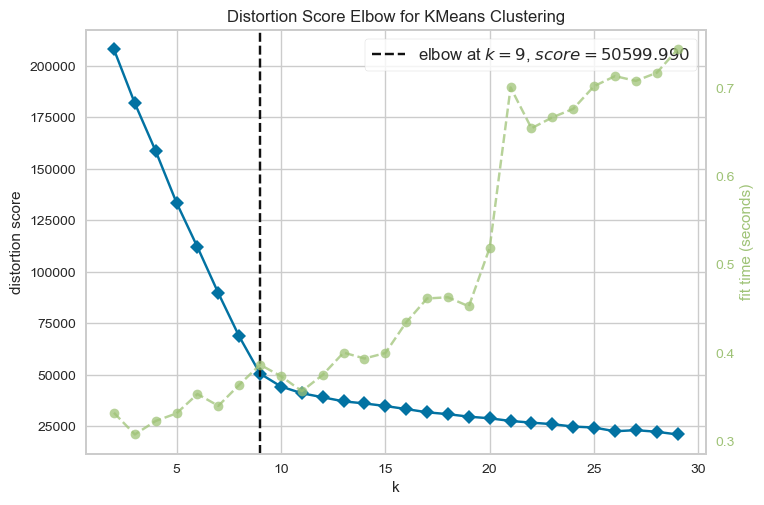

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [330]:
# Elbow Method for K means
from sklearn.cluster import KMeans
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state =10)
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(principal_components)        # Fit the data to the visualizer
visualizer.show()    

C:\Users\teran\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\teran\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\teran\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\teran\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

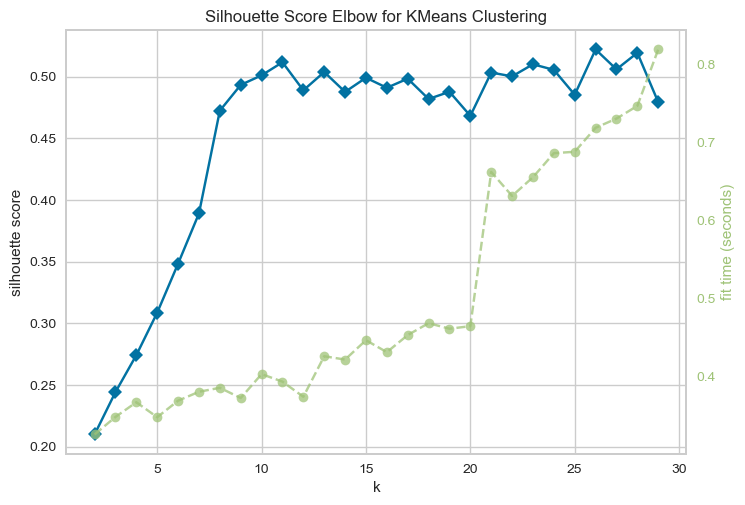

Optimal number of clusters based on silhouette score: [26]


In [331]:
# Silhouette Score for K means

# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state =10)
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='silhouette', timings= True, locate_elbow=False)
visualizer.fit(principal_components)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

df3 = pd.DataFrame(visualizer.k_values_,columns=['centers'])
df3['scores'] = visualizer.k_scores_
df4 = df3[df3.scores == df3.scores.max()]
print('Optimal number of clusters based on silhouette score:', df4['centers'].tolist())

C:\Users\teran\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\teran\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\teran\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\teran\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

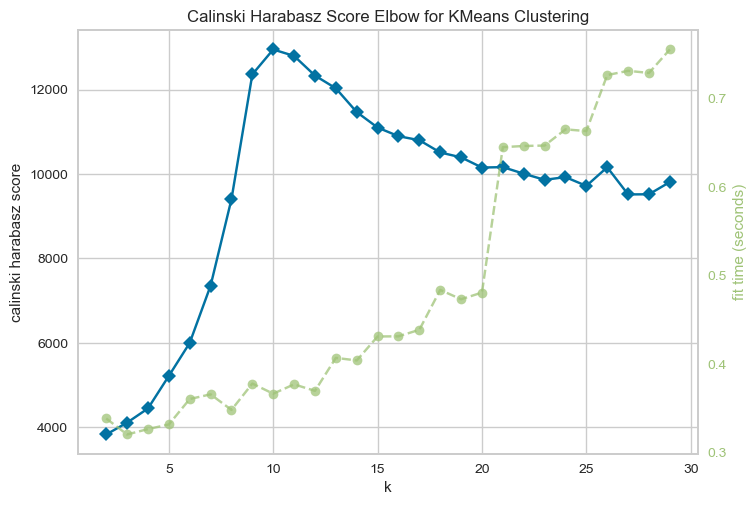

Optimal number of clusters based on calinski harabasz: [10]


In [332]:
# Calinski Harabasz Score for K means

# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state =10)
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='calinski_harabasz', timings= True, locate_elbow=False)
visualizer.fit(principal_components)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure


df3 = pd.DataFrame(visualizer.k_values_,columns=['centers'])
df3['scores'] = visualizer.k_scores_
df4 = df3[df3.scores == df3.scores.max()]
print('Optimal number of clusters based on calinski harabasz:', df4['centers'].tolist())

C:\Users\teran\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\teran\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\teran\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\teran\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

Optimal number of clusters based on DB score: [13]


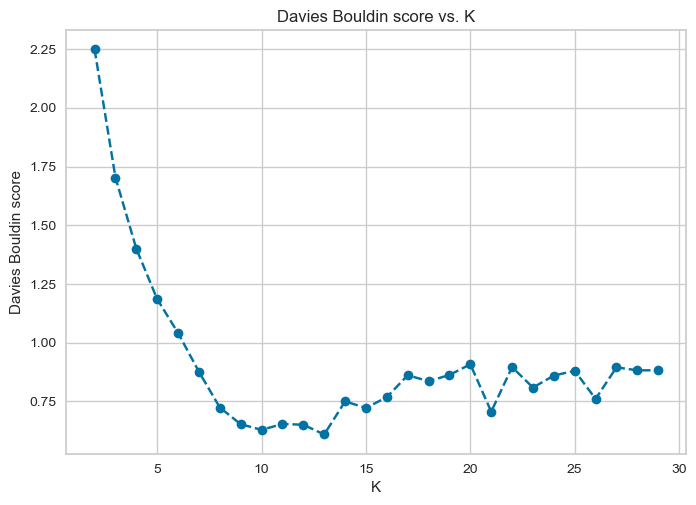

In [333]:
# Davies Bouldin score for K means

from sklearn.metrics import davies_bouldin_score 

def get_kmeans_score(data, center):
    '''
    returns the kmeans score regarding Davies Bouldin for points to centers
    INPUT:
        data - the dataset you want to fit kmeans to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the Davies Bouldin score for the kmeans model fit to the data
    '''
    #instantiate kmeans
    kmeans = KMeans(n_clusters=center,random_state =10)

    # Then fit the model to your data using the fit method
    model = kmeans.fit_predict(principal_components)
    
    # Calculate Silhoutte Score

    score = davies_bouldin_score(principal_components, model)
    
    return score

scores = []
centers = list(range(2,30))

for center in centers:
    scores.append(get_kmeans_score(principal_components, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. K');


df3 = pd.DataFrame(centers,columns=['centers'])
df3['scores'] = scores
df4 = df3[df3.scores == df3.scores.min()]
print('Optimal number of clusters based on DB score:', df4['centers'].tolist())

C:\Users\teran\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\teran\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\teran\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\teran\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

Optimal number of clusters based on gap statistic: [29.0]


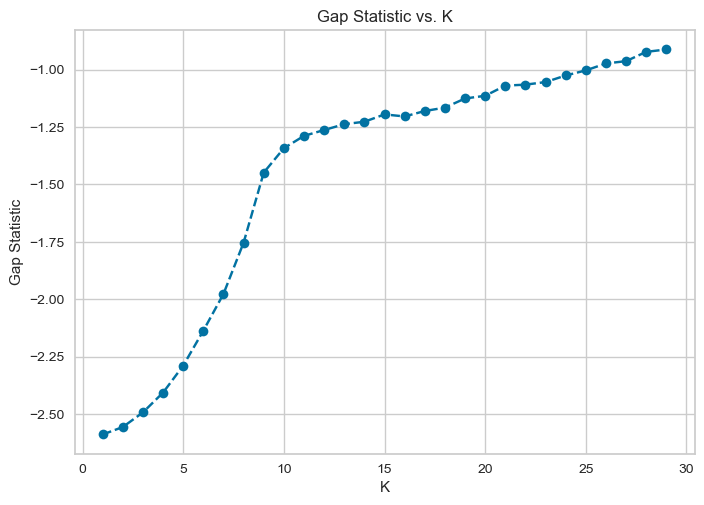

In [334]:
# Gap Statistic for K means


def optimalK(data, nrefs=3, maxClusters=15):
    """
    Calculates KMeans optimal K using Gap Statistic from Tibshirani, Walther, Hastie
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):

        # Holder for reference dispersion results
        refDisps = np.zeros(nrefs)

        # For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k, random_state =10)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp

        # Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_

        # Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)

        # Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf = resultsdf._append({'clusterCount':k, 'gap':gap}, ignore_index=True)

    return (gaps.argmax() + 1, resultsdf)

score_g, df = optimalK(principal_components, nrefs=5, maxClusters=30)

plt.plot(df['clusterCount'], df['gap'], linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Gap Statistic');
plt.title('Gap Statistic vs. K');

df2 = df[df.gap == df.gap.max()]
print('Optimal number of clusters based on gap statistic:', df2['clusterCount'].tolist())

In [335]:

# K means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
# Fit K-Means
kmeans_1 = KMeans(n_clusters=29, random_state= 10)
# Use fit_predict to cluster the dataset
predictions = kmeans_1.fit_predict(principal_components)
# Calculate cluster validation metrics
score_kemans_s = silhouette_score(principal_components, kmeans_1.labels_, metric='euclidean')
score_kemans_c = calinski_harabasz_score(principal_components, kmeans_1.labels_)
score_kemans_d = davies_bouldin_score(principal_components, predictions)


print('Silhouette Score: %.4f' % score_kemans_s)
print('Calinski Harabasz Score: %.4f' % score_kemans_c)
print('Davies Bouldin Score: %.4f' % score_kemans_d)

C:\Users\teran\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.4792
Calinski Harabasz Score: 9809.9757
Davies Bouldin Score: 0.8818


In [336]:
def gap_stat_kmeans(data = cluster_df,nrefs=3,k=4):
    # Gap Stat
    refDisps = np.zeros(nrefs)
    # For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
    for i in range(nrefs):

        # Create new random reference set
        randomReference = np.random.random_sample(size=principal_components.shape)

        # Fit to it
        km = KMeans(k, random_state =10)
        km.fit(randomReference)

        refDisp = km.inertia_
        refDisps[i] = refDisp

    # Fit cluster to original data and create dispersion
    km = KMeans(k)
    km.fit(principal_components)

    origDisp = km.inertia_

    # Calculate gap statistic
    score_g = np.log(np.mean(refDisps)) - np.log(origDisp)
    return score_g

score_kemans_g = gap_stat_kmeans(principal_components,3,4)
print('Gap Statistic Score: %.4f' % score_kemans_g)

C:\Users\teran\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\teran\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\teran\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\teran\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

Gap Statistic Score: -2.4115


In [337]:
pip install --upgrade matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/59/e2/6b155713e8da8274367b41315b66260f9d3c52d9f4b26336ddc3986ba612/matplotlib-3.8.1-cp311-cp311-win_amd64.whl.metadata
  Using cached matplotlib-3.8.1-cp311-cp311-win_amd64.whl.metadata (5.9 kB)
Using cached matplotlib-3.8.1-cp311-cp311-win_amd64.whl (7.6 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 32] El proceso no tiene acceso al archivo porque está siendo utilizado por otro proceso: 'C:\\Users\\teran\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans-Oblique.ttf'
Consider using the `--user` option or check the permissions.



In [338]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38197 entries, 0 to 38196
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   AÑO        38197 non-null  int64
 1   GRAVEDAD   38197 non-null  int64
 2   PEATON     38197 non-null  int64
 3   AUTOMOVIL  38197 non-null  int64
 4   CAMPAERO   38197 non-null  int64
 5   CAMIONETA  38197 non-null  int64
 6   MICRO      38197 non-null  int64
 7   BUSETA     38197 non-null  int64
 8   BUS        38197 non-null  int64
 9   CAMION     38197 non-null  int64
 10  VOLQUETA   38197 non-null  int64
 11  MOTO       38197 non-null  int64
 12  BICICLETA  38197 non-null  int64
 13  OTRO       38197 non-null  int64
dtypes: int64(14)
memory usage: 4.1 MB


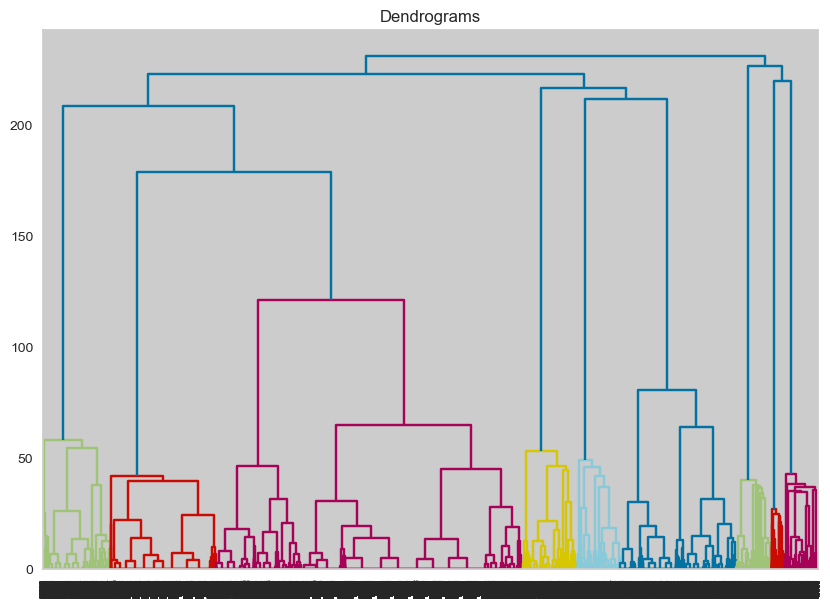

In [339]:
# Dendrogram for Hierarchical Clustering
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(10, 7))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(principal_components, method='ward'))

In [340]:
# Agglomerative clustering
from numpy import unique
from numpy import where
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot

# define the model
model = AgglomerativeClustering(n_clusters=10)
# fit model and predict clusters
yhat = model.fit(principal_components)
yhat_2 = model.fit_predict(principal_components)
# retrieve unique clusters
clusters = unique(yhat)


# Calculate cluster validation metrics

score_AGclustering_s = silhouette_score(principal_components, yhat.labels_, metric='euclidean')

score_AGclustering_c = calinski_harabasz_score(principal_components, yhat.labels_)

score_AGclustering_d = davies_bouldin_score(principal_components, yhat_2)



print('Silhouette Score: %.4f' % score_AGclustering_s)
print('Calinski Harabasz Score: %.4f' % score_AGclustering_c)

print('Davies Bouldin Score: %.4f' % score_AGclustering_d)

Silhouette Score: 0.4845
Calinski Harabasz Score: 12538.0473
Davies Bouldin Score: 0.6580


## DBSCAN

In [342]:
pip install kneed


  Obtaining dependency information for kneed from https://files.pythonhosted.org/packages/9a/1b/7e726d8616e813007874468c61790099ba21493e0ea07561b7d9fc53151c/kneed-0.8.5-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


0.0


<Figure size 500x500 with 0 Axes>

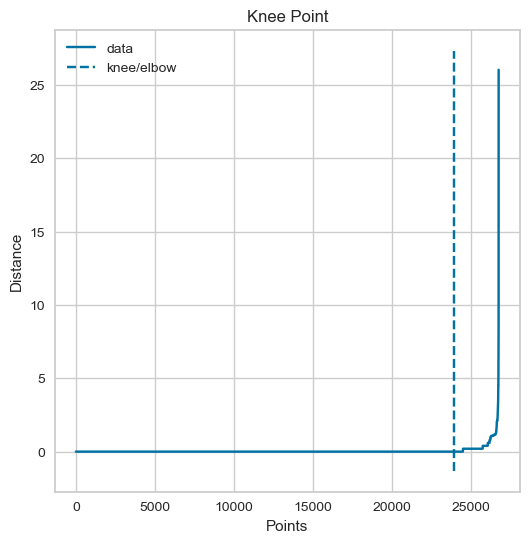

In [359]:
# parameter tuning for eps
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=12)
neighbors = nearest_neighbors.fit(principal_components)
distances, indices = neighbors.kneighbors(principal_components)
distances = np.sort(distances[:,10], axis=0)

from kneed import KneeLocator
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])

Optimal number of min_samples based on silhouette score: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


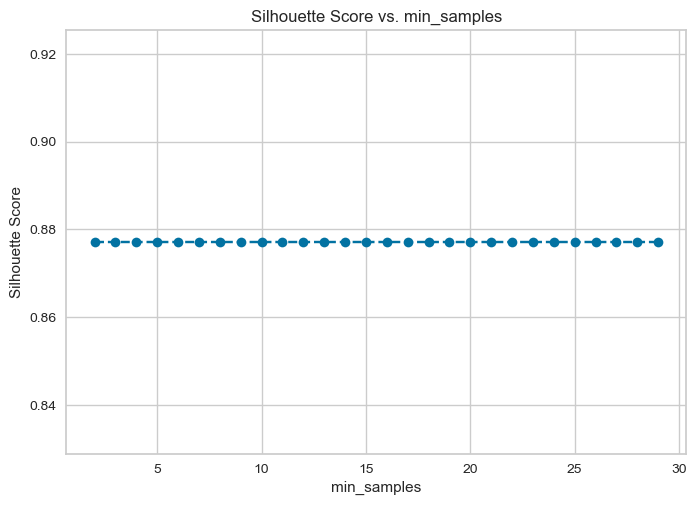

In [357]:
# Silhouette Score for DBSCAN

from sklearn.metrics import silhouette_score 
from sklearn.cluster import DBSCAN

def get_dbscan_score(data, center):
    '''
    
    INPUT:
        data - the dataset you want to fit kmeans to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the Silhouette Score for DBSCAN
    '''
    #instantiate kmeans
    dbscan = DBSCAN(eps= 1, min_samples=center)

    # Then fit the model to your data using the fit method
    model = dbscan.fit(principal_components)
    
    # Calculate Silhoutte Score

    score = silhouette_score(principal_components, model.labels_, metric='euclidean')
    
    return score

scores = []
centers = list(range(2,30))

for center in centers:
    scores.append(get_dbscan_score(principal_components, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('min_samples');
plt.ylabel('Silhouette Score');
plt.title('Silhouette Score vs. min_samples');

df3 = pd.DataFrame(centers,columns=['min_samples'])
df3['scores'] = scores
df4 = df3[df3.scores == df3.scores.max()]
print('Optimal number of min_samples based on silhouette score:', df4['min_samples'].tolist())

Optimal number of min_sample based on Calinski Harabasz score: [23]


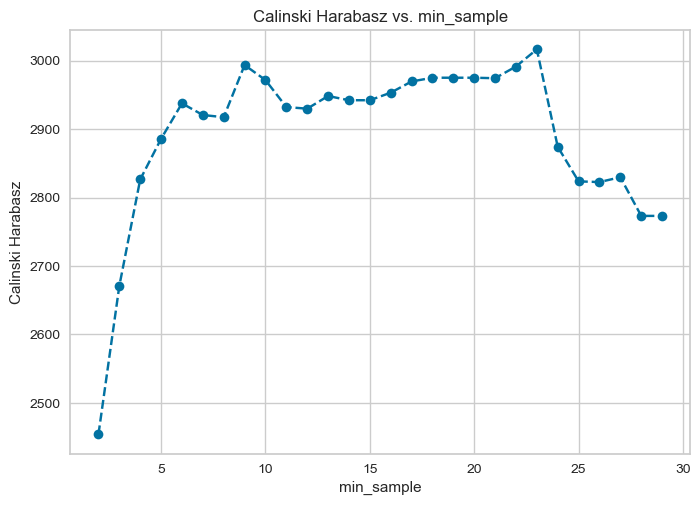

In [362]:
# Calinski Harabasz for DBSCAN

from sklearn.metrics import calinski_harabasz_score  

def get_dbscan_score(data, center):
    '''
    
    INPUT:
        data - the dataset you want to fit dbscan to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the Calinski Harabasz score for the dbscan model fit to the data
    '''
    #instantiate dbscan
    dbscan = DBSCAN(eps= 1, min_samples=center)

    # Then fit the model to your data using the fit method
    model = dbscan.fit(principal_components)
    
    # Calculate Silhoutte Score

    score = calinski_harabasz_score(principal_components, dbscan.labels_)
    
    return score

scores = []
centers = list(range(2,30))

for center in centers:
    scores.append(get_dbscan_score(principal_components, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('min_sample');
plt.ylabel('Calinski Harabasz');
plt.title('Calinski Harabasz vs. min_sample');

df3 = pd.DataFrame(centers,columns=['min_sample'])
df3['scores'] = scores
df4 = df3[df3.scores == df3.scores.max()]
print('Optimal number of min_sample based on Calinski Harabasz score:', df4['min_sample'].tolist())

## GMM Clustering

In [363]:
# BIC for GMM

from sklearn.mixture import GaussianMixture
n_components = range(1, 30)
covariance_type = ['spherical', 'tied', 'diag', 'full']
score=[]
for cov in covariance_type:
    for n_comp in n_components:
        gmm=GaussianMixture(n_components=n_comp,covariance_type=cov, random_state = 10)
        gmm.fit(principal_components)
        score.append((cov,n_comp,gmm.bic(principal_components)))
score_1 = pd.DataFrame(score)
score_1.columns = ['Covariance_Type', 'N_Components','BIC_Score']
score_2 = score_1[score_1.BIC_Score == score_1.BIC_Score.min()]

score_2.head(n=2)

,Covariance_Type,N_Components,BIC_Score
115,full,29,-1.625817e+06


In [365]:
# Silhouette Score for GMM


n_components = range(2, 30)
covariance_type = ['spherical', 'tied', 'diag', 'full']
score=[]
for cov in covariance_type:
    for n_comp in n_components:
        gmm=GaussianMixture(n_components=n_comp,covariance_type=cov,random_state = 10)
        model = gmm.fit(principal_components)
        model_2 = model.predict(principal_components)
        score_s = silhouette_score(principal_components, model_2, metric='euclidean')
        score.append((cov,n_comp,score_s))
score_1 = pd.DataFrame(score)
score_1.columns = ['Covariance_Type', 'N_Components','Silhouette_Score']
score_2 = score_1[score_1.Silhouette_Score == score_1.Silhouette_Score.max()]
score_2.head(n=2)

,Covariance_Type,N_Components,Silhouette_Score
37,tied,11,0.50998


In [366]:
# Calinski Harabasz Score for GMM


n_components = range(2, 30)
covariance_type = ['spherical', 'tied', 'diag', 'full']
score=[]
for cov in covariance_type:
    for n_comp in n_components:
        gmm=GaussianMixture(n_components=n_comp,covariance_type=cov, random_state = 10)
        model = gmm.fit(principal_components)
        model_2 = model.predict(principal_components)
        score_c = calinski_harabasz_score(principal_components, model_2)
        score.append((cov,n_comp,score_c))
score_1 = pd.DataFrame(score)
score_1.columns = ['Covariance_Type', 'N_Components','Calinski_Harabasz_Score']
score_2 = score_1[score_1.Calinski_Harabasz_Score == score_1.Calinski_Harabasz_Score.max()]
score_2.head(n=5)

,Covariance_Type,N_Components,Calinski_Harabasz_Score
36,tied,10,12810.466907


In [367]:
# Davies Bouldin Score for GMM


n_components = range(2, 30)
covariance_type = ['spherical', 'tied', 'diag', 'full']
score=[]
for cov in covariance_type:
    for n_comp in n_components:
        gmm=GaussianMixture(n_components=n_comp,covariance_type=cov, random_state = 10)
        model = gmm.fit(cluster_df)
        model_2 = model.predict(principal_components)
        score_d = davies_bouldin_score(principal_components, model_2)
        score.append((cov,n_comp,score_d))
score_1 = pd.DataFrame(score)
score_1.columns = ['Covariance_Type', 'N_Components','Davies_Bouldin_Score']
score_2 = score_1[score_1.Davies_Bouldin_Score == score_1.Davies_Bouldin_Score.max()]
score_2.head(n=2)

,Covariance_Type,N_Components,Davies_Bouldin_Score
56,diag,2,2.961534


In [368]:
# gaussian mixture clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot
# define the model
model = GaussianMixture(n_components= 29,covariance_type= "full", random_state = 10)
# fit the model
model.fit(principal_components)
# assign a cluster to each example
yhat = model.predict(principal_components)
# retrieve unique clusters
clusters = unique(yhat)



# Calculate cluster validation score

score_dbsacn_s = silhouette_score(principal_components, yhat, metric='euclidean')

score_dbsacn_c = calinski_harabasz_score(principal_components, yhat)

score_dbsacn_d = davies_bouldin_score(principal_components, yhat)



print('Silhouette Score: %.4f' % score_dbsacn_s)
print('Calinski Harabasz Score: %.4f' % score_dbsacn_c)
print('Davies Bouldin Score: %.4f' % score_dbsacn_d)

Silhouette Score: 0.4610
Calinski Harabasz Score: 5705.2072
Davies Bouldin Score: 1.5842


Silhouette Score:

El Silhouette Score cuantifica qué tan bien separados están los clusters. Varía de -1 a 1, donde un valor más alto indica clusters mejor definidos y bien separados. En tu caso, un Silhouette Score de 0.4610 sugiere que los clusters están relativamente bien definidos y separados.

Calinski Harabasz Score:

El Calinski Harabasz Score es una medida de la compacidad y separación entre los clusters. Valores más altos indican clusters más densos y mejor separados. Tu resultado de 5705.2072 sugiere una buena calidad en la separación y densidad de los clusters.
Davies Bouldin Score:

El Davies Bouldin Score mide la compacidad y separación similar al Calinski Harabasz Score, pero puede ser más sensible a la presencia de clusters con diferentes dispersiones. Un valor más bajo indica clusters mejor definidos. En tu caso, un valor de 1.5842 sugiere una buena calidad en la definición de los clusters.